In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib as mpl
import datetime
import os
from itertools import accumulate
from math import floor
from pandas.tseries.offsets import MonthEnd
import plotting 
from matplotlib.colors import LogNorm, Normalize
from  matplotlib import colormaps as cmaps 
import matplotlib.patches as mpatches
from matplotlib import colors
from os import path
import geopandas as gpd
import json
import re

In [14]:
_HOME_ = path.expanduser("~") + "/PHD"
import modify_dataset

In [15]:
phyto_abundances = pd.read_csv(_HOME_ + "/MSFD/Data/Modulo1/phyto_abund_modified.csv", index_col=0)
phyto_abundances.loc[:, "Date"] = pd.to_datetime(phyto_abundances["Date"])
with open(_HOME_ + "/ISPRA_20152017_Analysis/params.json") as file: 
    params = json.load(file)
best_path = params["best_path"]
best_path_sard = params["best_path_sard"]
ordered_regions = params["ordered_regions"]
seasons = params["seasons"]
sorted_season = params["sorted_season"]
sea_index = params["sea_index"]
ordered_id = params["ordered_id"]
sea_index_array = np.array(list(sea_index.values()))
del params
phyto_abund_simplified = modify_dataset.make_simplified_dataset(phyto_abundances, 0.7)
phyto_abund_simplified = modify_dataset.add_season_column(phyto_abund_simplified, seasons)
phyto_abund_simplified = modify_dataset.add_coast_dist_column(phyto_abund_simplified)
phyto_abund_simplified["Date"] = pd.to_datetime(phyto_abund_simplified["Date"]) + MonthEnd(0)
phyto_abund_simplified["Region"] = pd.Categorical(phyto_abund_simplified["Region"], categories = ordered_regions, ordered = True)
taxonomic_tree = pd.read_excel(_HOME_ + "/ISPRA_20152017_Analysis/Phyto_taxonomic_tree.xlsx")
taxonomic_tree.drop_duplicates(inplace=True)
phyto_abund_simplified = phyto_abund_simplified.merge(taxonomic_tree.loc[:,["ScientificName", "Genus", "Class"]], how = "left", left_on="Taxon", right_on="ScientificName")
phyto_abund_simplified["Class"] = phyto_abund_simplified["Class"].astype(str)
phyto_abund_simplified = modify_dataset.add_det_level_column(phyto_abund_simplified)
phyto_abund_simplified = phyto_abund_simplified.loc[:,
                                                    ["Region", "id", "Longitude", "Latitude", "Closest_coast", "Coast_dist", "Date", "Season_year", "Season", "Sample_depth", "Class", "Genus", "Det_level", "Taxon", "Num_cell_l", "file_name"]
                                                    ]
transects_info = pd.read_csv(_HOME_ + "/ISPRA_20152017_Analysis/transects_info.csv")
transects_info["Transect"] = transects_info["Transect"].str.upper()
phyto_abund_simplified = phyto_abund_simplified.merge(transects_info, how = "left", on = "id")

In [16]:
from_region_to_abreviation = {
    "Friuli-Venezia-Giulia" : "FVG",
    "Veneto" : "VEN", 
    "Emilia-Romagna" : "EMR",
    "Marche" : "MAR",
    "Abruzzo" : "ABR",
    "Molise" : "MOL",
    "Puglia" : "PUG",
    "Basilicata" : "BAS",
    "Calabria" : "CAL",
    "Campania" : "CAM", 
    "Lazio" : "LAZ",
    "Toscana" : "TOS",
    "Liguria" : "LIG",
     "Sicilia" : "SIC",
    "Sardegna" : "SAR"
}

In [7]:
for region, abbrv in from_region_to_abreviation.items():
    print(f"{region} & {abbrv} \\\\")
    print("\hline")

Friuli-Venezia-Giulia & FVG \\
\hline
Veneto & VEN \\
\hline
Emilia-Romagna & EMR \\
\hline
Marche & MAR \\
\hline
Abruzzo & ABR \\
\hline
Molise & MOL \\
\hline
Puglia & PUG \\
\hline
Basilicata & BAS \\
\hline
Calabria & CAL \\
\hline
Campania & CAM \\
\hline
Lazio & LAZ \\
\hline
Toscana & TOS \\
\hline
Liguria & LIG \\
\hline
Sicilia & SIC \\
\hline
Sardegna & SAR \\
\hline


<>:3: SyntaxWarning: invalid escape sequence '\h'
<>:3: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_15397/1044032410.py:3: SyntaxWarning: invalid escape sequence '\h'
  print("\hline")


In [17]:
phyto_abundances["Date"] = pd.to_datetime(phyto_abundances["Date"]) + MonthEnd(0)
phyto_abundances["Region"] = phyto_abundances["Region"].map(from_region_to_abreviation)
phyto_abundances["Region"] = pd.Categorical(phyto_abundances["Region"], categories = list(from_region_to_abreviation.values()), ordered = True)

In [18]:
phyto_abundances.drop_duplicates(["Date", "id", "Sample_depth"]).groupby("Region").count()

/tmp/ipykernel_70180/1151846704.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  phyto_abundances.drop_duplicates(["Date", "id", "Sample_depth"]).groupby("Region").count()


id  Longitude  Latitude  Closest_coast  Date  Sample_depth  Group  \
Region                                                                       
FVG     181        181       181            181   181           181    181   
VEN     143        143       143            143   143           143    143   
EMR     540        540       540            540   540           540    540   
MAR     229        229       229            229   229           229    229   
ABR     174        174       174            174   174           174    174   
MOL      90         90        90             90    90            90     90   
PUG     537        537       537            537   537           537    537   
BAS      65         65        65             65    65            65     65   
CAL     191        191       191            191   191           191    191   
CAM     361        361       361            361   361           361    361   
LAZ     284        284       284            284   284           284    284   
TOS     286        286       286            286   286           286    286   
LIG     360        360       360            360   360           360    360   
SIC     437        437       437            437   437           437    437   
SAR     538        538       538            538   538           538    538   

        Taxon  Num_cell_l  file_name  Remarks  
Region                                         
FVG       181         181        181        0  
VEN       143         143        143        0  
EMR       540         540        540        0  
MAR       229         229        229        0  
ABR       174         174        174       13  
MOL        90          90         90        0  
PUG       537         537        537        0  
BAS        65          65         65        1  
CAL       191         191        191        0  
CAM       361         361        361        0  
LAZ       284         284        284        1  
TOS       286         286        286        0  
LIG       360         360        360        1  
SIC       437         437        437        0  
SAR       538         538        538        0

In [19]:
phyto_abund_simplified["Region"] = phyto_abund_simplified["Region"].map(from_region_to_abreviation)

In [20]:
phyto_abund_simplified["Region"] = pd.Categorical(phyto_abund_simplified["Region"], categories = list(from_region_to_abreviation.values()), ordered = True)

In [21]:
phyto_abund_simplified.loc[phyto_abund_simplified["Taxon"] == 'Pseudo-nitzschia spp. del nitzschia delicatissima complex', "Taxon"] = 'Pseudo-nitzschia delicatissima complex'
phyto_abund_simplified.loc[phyto_abund_simplified["Taxon"] == 'Pseudo-nitzschia spp. del nitzschia seriata complex', "Taxon"] = 'Pseudo-nitzschia seriata complex'

In [10]:
stations_basins = pd.read_csv(_HOME_ + "/ISPRA_20152017_Analysis/Description/Stations_Basins.csv")

In [23]:
phyto_abund_simplified = phyto_abund_simplified.merge(stations_basins, how = "left", on = "id")

In [25]:
phyto_abund_simplified.columns

Index(['Region', 'id', 'Longitude', 'Latitude', 'Closest_coast', 'Coast_dist',
       'Date', 'Season_year', 'Season', 'Sample_depth', 'Class', 'Genus',
       'Det_level', 'Taxon', 'Num_cell_l', 'file_name', 'Transect', 'SeaDepth',
       'Basin'],
      dtype='object')

In [30]:
phyto_abund_simplified.loc[:,
                           ['Region', 'id', 'Longitude', 'Latitude', 'Closest_coast', 'Coast_dist',
       'Date', 'Season_year', 'Season', 'Sample_depth', 'Class', 'Genus',
       'Det_level', 'Taxon', 'Num_cell_l', 'Transect', 'SeaDepth',
       'Basin']
                           ].to_csv(_HOME_ + "/ISPRA_20152017_Analysis/Paper_1/phyto_abund.csv", index = False)

In [ ]:
phyto_abund_simplified.to_csv()

In [11]:
italy = gpd.read_file(_HOME_ + "/ISPRA_20152017_Analysis/Description/Italy_shp/Italy.shp")
surroundings = gpd.read_file(_HOME_ + "/ISPRA_20152017_Analysis/Description/Surrounding_shp/Surrounding.shp")
basins = gpd.read_file(_HOME_ + "/ISPRA_20152017_Analysis/Description/Basins_shp/Basins.shp")

In [12]:
basins_centers = basins.copy()
basins_centers["geometry"] = basins["geometry"].to_crs(3857).centroid.to_crs(basins.crs)
region_centers = italy.loc[italy["region"].isin(list(from_region_to_abreviation.keys())), :]
region_centers.loc[:, "geometry"] = italy.loc[italy["region"].isin(list(from_region_to_abreviation.keys())), "geometry"].to_crs(3857).centroid.to_crs(italy.crs);
region_centers.loc[:, "region"] = region_centers["region"].map(from_region_to_abreviation);

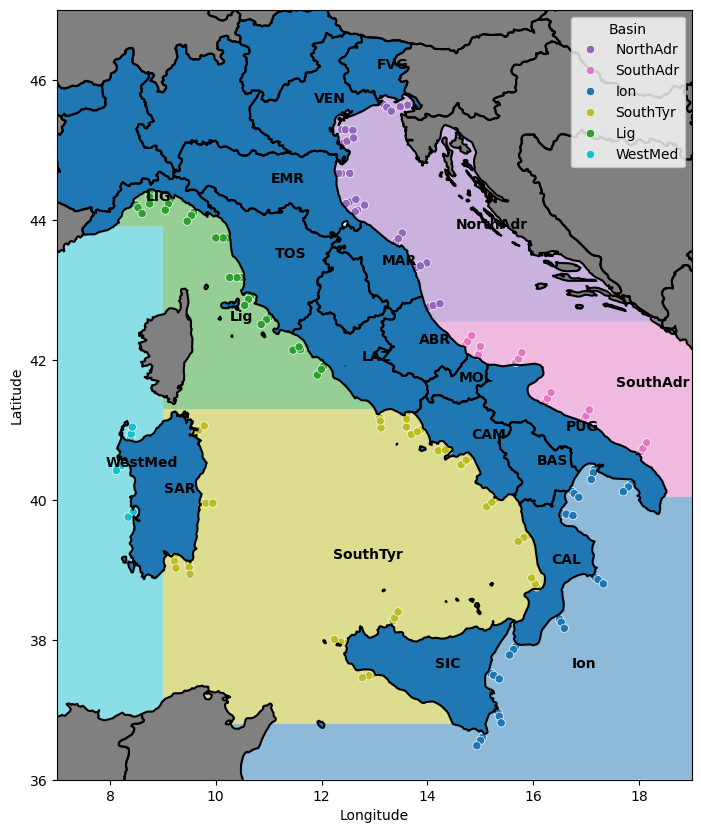

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))

colors = plt.get_cmap("tab10", basins["Basin"].size)
palette = dict(zip(basins["Basin"], colors.colors))
italy.boundary.plot(ax=ax, color='black')
surroundings.plot(ax = ax, color = "grey")
surroundings.boundary.plot(ax = ax, color = "black")
italy.plot(ax = ax)
basins.plot("Basin",ax = ax, cmap = colors, alpha = 0.5)
for idx, row in region_centers.iterrows(): 
    ax.text(row["geometry"].x, row["geometry"].y, row["region"], fontsize=10, weight = "bold")
for idx, row in basins_centers.iterrows(): 
    ax.text(row["geometry"].x, row["geometry"].y, row["Basin"], fontsize=10, weight = "bold")
sns.scatterplot(data = phyto_abund_simplified.loc[:, ["Longitude", "Latitude", "Basin"]].drop_duplicates(), x = "Longitude", y = "Latitude", ax = ax, hue = "Basin", palette=palette)
ax.set_xlim(7,19)
ax.set_ylim(36,47)
fig.savefig(_HOME_ + "/ISPRA_20152017_Analysis/Description/Italy_map.png", dpi = 300, bbox_inches = "tight")

# First part

In [26]:
phyto_abund_simplified.query("Taxon != 'Other phytoplankton' and Det_level == 'Species'")[["Class", "Taxon"]].groupby("Class").nunique().sort_values("Taxon", ascending = False).to_csv(_HOME_ + "/ISPRA_20152017_Analysis/Description/phyto_classes.csv")

In [13]:
phyto_abund_simplified.query("Taxon != 'Other phytoplankton'").groupby("Taxon").count()["Num_cell_l"].quantile(np.arange(0, 1.05, 0.05))

0.00       1.00
0.05       1.00
0.10       1.00
0.15       1.00
0.20       2.00
0.25       3.00
0.30       4.00
0.35       5.00
0.40       7.00
0.45       8.25
0.50      12.00
0.55      16.00
0.60      22.00
0.65      30.00
0.70      44.00
0.75      63.00
0.80      90.00
0.85     131.25
0.90     216.50
0.95     416.50
1.00    1380.00
Name: Num_cell_l, dtype: float64

In [27]:
phyto_abund_simplified.query("Taxon != 'Other phytoplankton'").groupby("Taxon").count()[["Num_cell_l"]].query("Num_cell_l >416 ").sort_values(ascending=False, by = "Num_cell_l").to_csv(
    _HOME_ + "/ISPRA_20152017_Analysis/Description/Taxa_freq_95.csv")

In [58]:
freq_taxa = phyto_abund_simplified.query("Taxon != 'Other phytoplankton'").groupby("Taxon").count()[["Num_cell_l"]].query("Num_cell_l >= 416 ").sort_values(ascending=False, by = "Num_cell_l").index

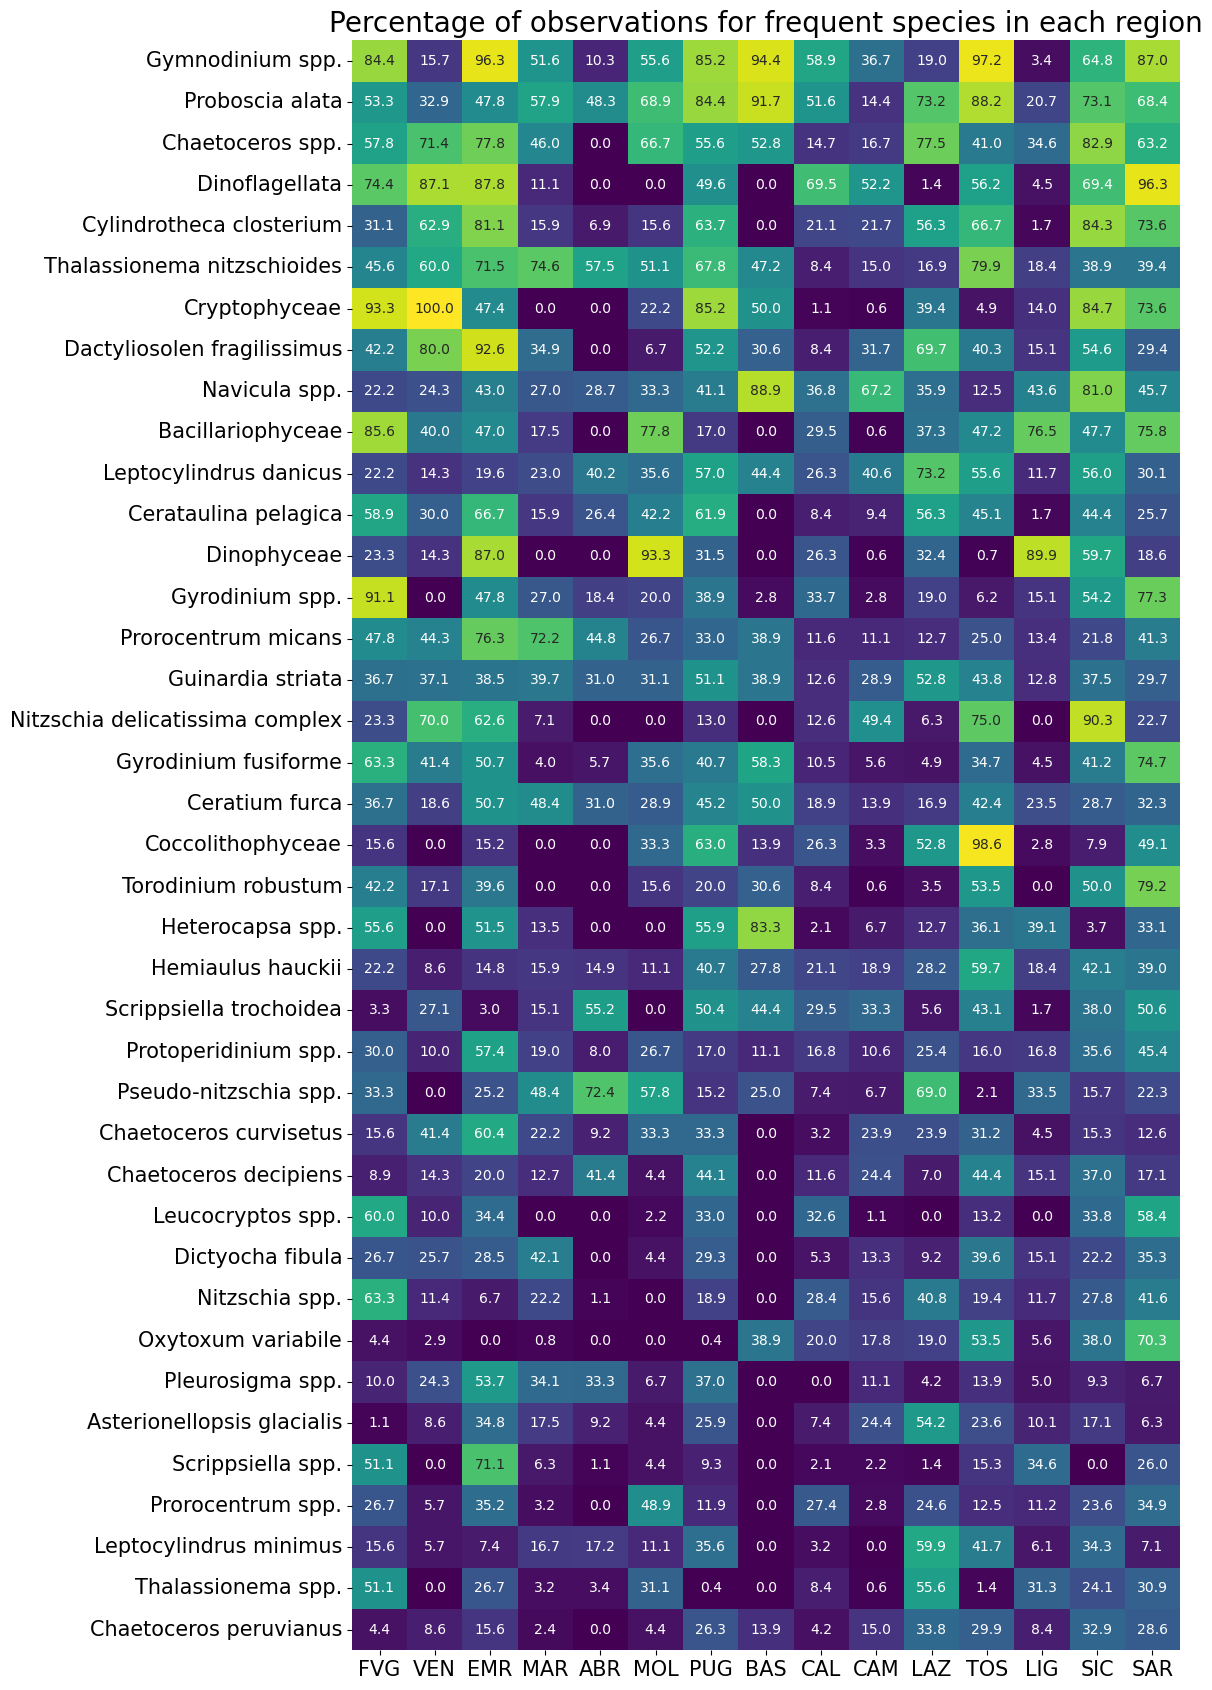

In [187]:
pres_abs = phyto_abund_simplified.query("Taxon in @freq_taxa").pivot_table(
    index= ["Region", "Date", "id"], 
    columns="Taxon",
    values="Num_cell_l",
    aggfunc="mean",
    fill_value=0
) > 0
pres_abs.reset_index(inplace=True)
n_region_samples = pres_abs.drop_duplicates(["Date", "id"]).groupby("Region", observed=True).count()["id"].to_numpy()
fig, ax = plt.subplots(figsize=(12, 17))

sns.heatmap(
data = pres_abs.groupby("Region", observed=True).sum(numeric_only=True).apply(lambda x: x / n_region_samples, axis=0).T.loc[freq_taxa, :] * 100, 
cmap = "viridis",
annot=True,
fmt=".1f",
ax = ax, 
cbar=False
)
ax.set_yticks(ax.get_yticks());
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, size = 15);
ax.set_xticks(ax.get_xticks());
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 15);
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Percentage of observations for frequent species in each region", fontsize = 20)
plt.tight_layout()
plt.savefig(_HOME_ + "/ISPRA_20152017_Analysis/Description/Species_freq_95_heatmap.png", dpi = 300, bbox_inches = "tight")

/tmp/ipykernel_14543/3907301209.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pres_abs = phyto_abund_simplified.query("Taxon in @freq_taxa").pivot_table(


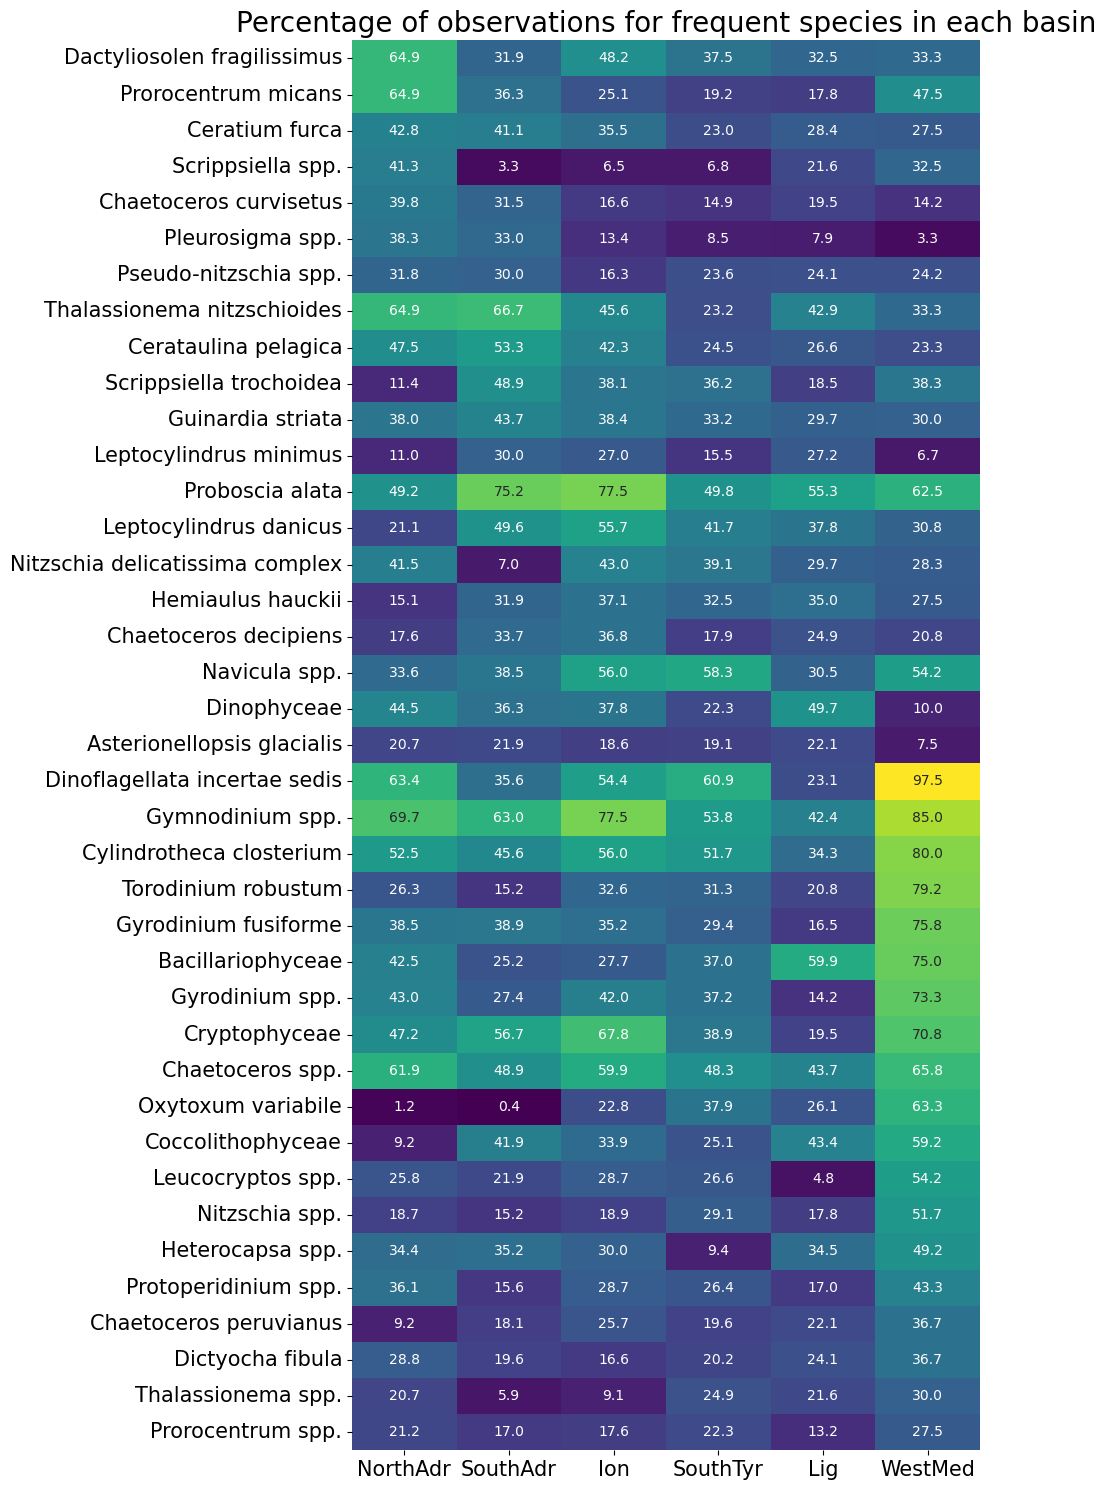

In [87]:
pres_abs = phyto_abund_simplified.query("Taxon in @freq_taxa").pivot_table(
    index= ["Basin", "Date", "id"], 
    columns="Taxon",
    values="Num_cell_l",
    aggfunc="mean",
    fill_value=0
) > 0
pres_abs.reset_index(inplace=True)
n_Basin_samples = pres_abs.drop_duplicates(["Date", "id"]).groupby("Basin", observed=True).count()["id"].to_numpy()
pres_abs = pres_abs.groupby("Basin", observed=True).sum(numeric_only=True).apply(lambda x: x / n_Basin_samples, axis=0).T.loc[freq_taxa, :] * 100
pres_abs_long = pres_abs.reset_index().melt(id_vars = "Taxon", var_name = "Basin", value_name = "Freq")
pres_abs_long["Basin"] = pd.Categorical(pres_abs_long["Basin"], categories = ["NorthAdr", "SouthAdr", "Ion", "SouthTyr", "Lig", "WestMed"], ordered = True)
idx = pres_abs_long.groupby("Taxon")["Freq"].idxmax()
ordered_ids = pres_abs_long.loc[idx].sort_values(["Basin", "Freq"], ascending=[True, False])["Taxon"]


fig, ax = plt.subplots(figsize=(10, 15))
sns.heatmap(
data = pres_abs.loc[ordered_ids, :], 
cmap = "viridis",
annot=True,
fmt=".1f",
ax = ax, 
cbar=False
)
ax.set_yticks(ax.get_yticks());
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, size = 15);
ax.set_xticks(ax.get_xticks());
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 15);
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Percentage of observations for frequent species in each basin", fontsize = 20)
plt.tight_layout()
plt.savefig(_HOME_ + "/ISPRA_20152017_Analysis/Description/Species_freq_95_heatmap_per_basin.png", dpi = 300, bbox_inches = "tight")

In [74]:
data = phyto_abund_simplified.groupby("Taxon").sum(numeric_only=True).sort_values("Num_cell_l", ascending = False)
data["Percent_cumsum"] = data["Num_cell_l"].cumsum() / data["Num_cell_l"].sum()
data["Percen_abund"] = data["Num_cell_l"] / data["Num_cell_l"].sum() * 100

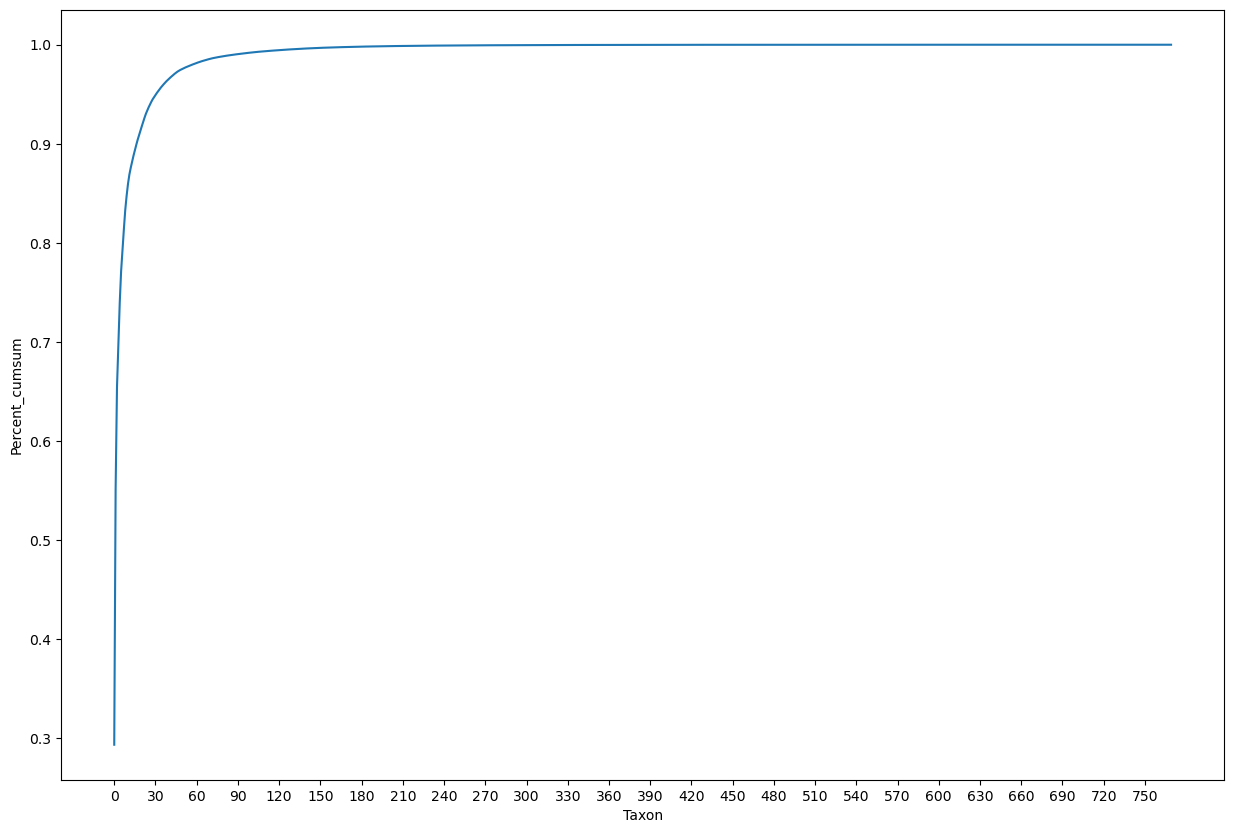

In [29]:
fig, ax = plt.subplots(figsize=(15, 10))

#.query("Taxon != 'Other phytoplankton'")

sns.lineplot(
    x = "Taxon",
    y = "Percent_cumsum",
    data = data,
    ax = ax
)
ax.set_xticks(np.arange(0, len(data), 30));
ax.set_xticklabels(np.arange(0, len(data), 30));

In [75]:
abund_taxa = data.query("Percent_cumsum <= 0.95")["Percen_abund"].index

In [66]:
data.query("Percent_cumsum <= 0.95")["Percen_abund"].to_csv(_HOME_ + "/ISPRA_20152017_Analysis/Description/Species_abund_95.csv")

In [159]:
rel_taxa = set(freq_taxa).union(set(abund_taxa))

In [172]:
phyto_abund_simplified.groupby("Region", observed=True).nunique()[["Taxon"]]

Taxon
Region       
FVG       221
VEN       146
EMR       290
MAR       227
ABR       107
MOL       113
PUG       378
BAS        75
CAL       209
CAM       169
LAZ       216
TOS       389
LIG       215
SIC       249
SAR       445

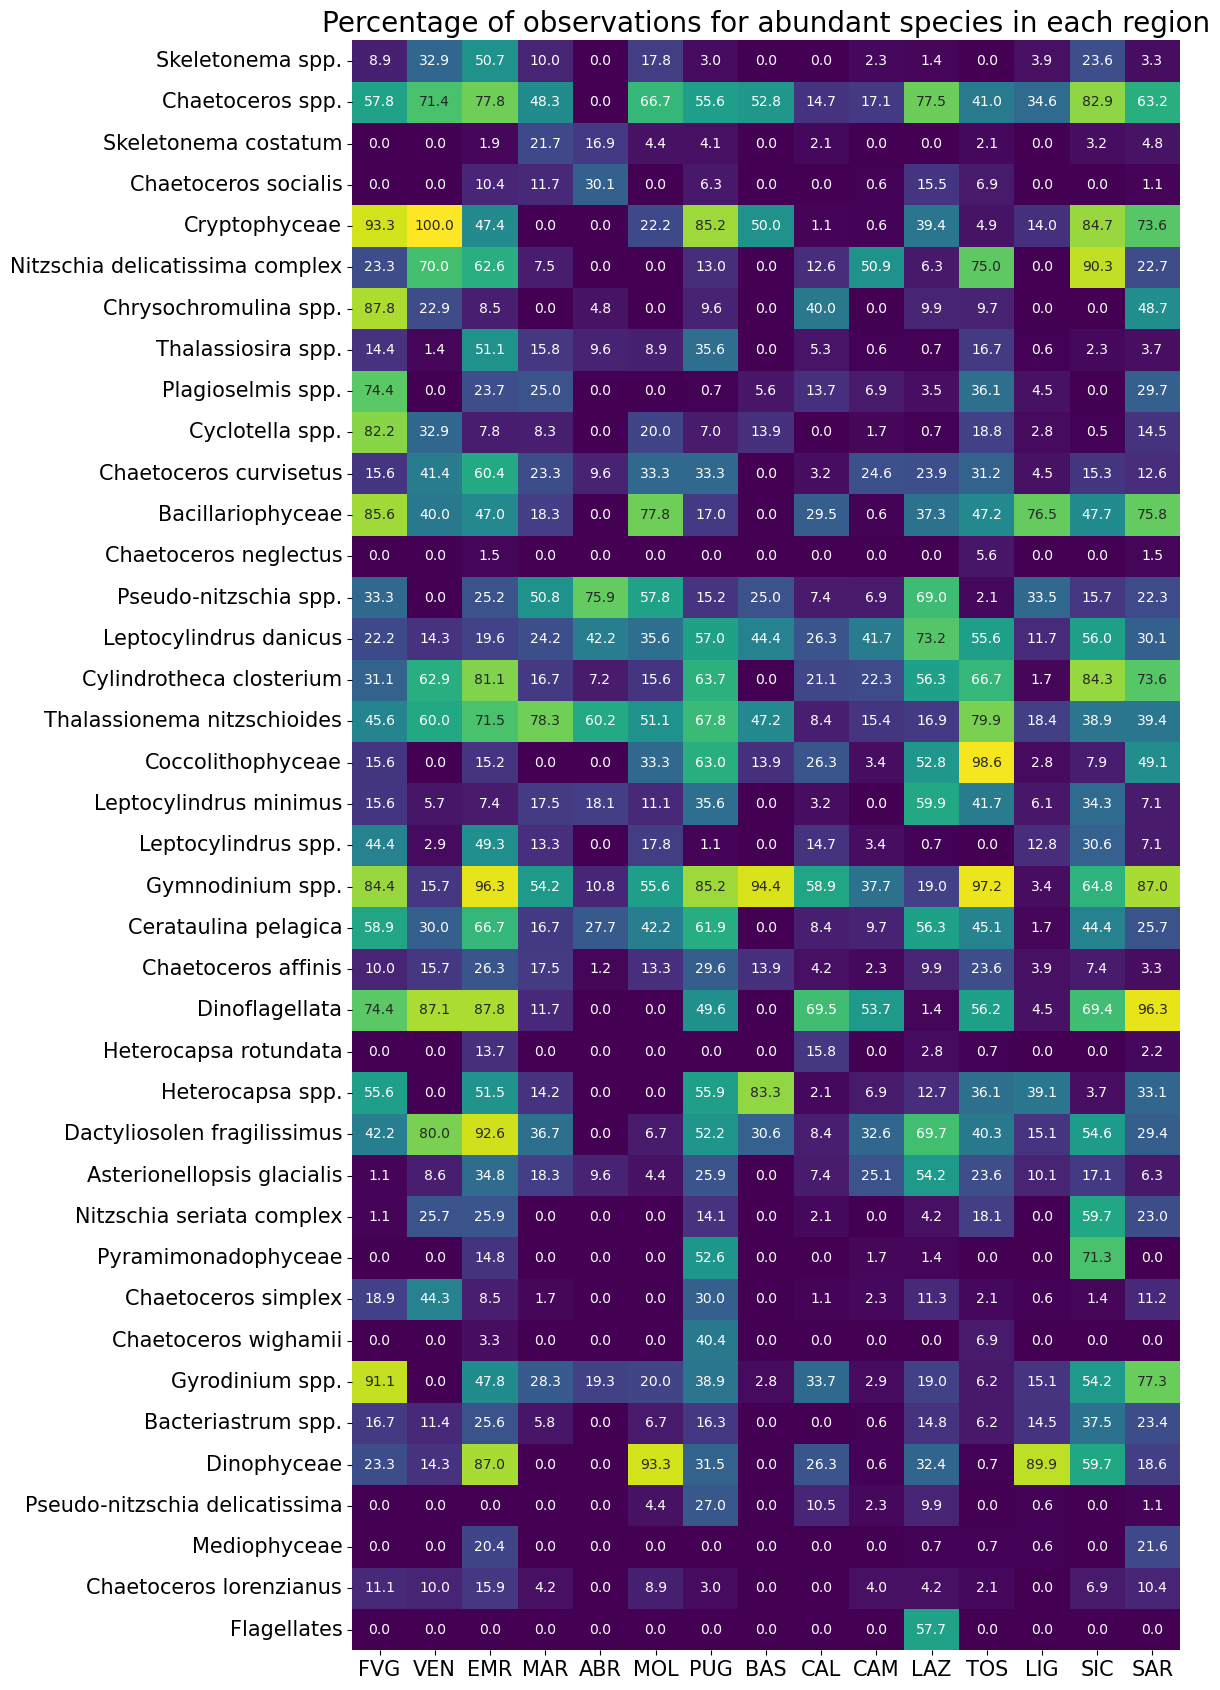

In [190]:
pres_abs = phyto_abund_simplified.query("Taxon in @abund_taxa").pivot_table(
    index= ["Region", "Date", "id"], 
    columns="Taxon",
    values="Num_cell_l",
    aggfunc="mean",
    fill_value=0
) > 0
pres_abs.reset_index(inplace=True)
n_region_samples = pres_abs.drop_duplicates(["Date", "id"]).groupby("Region", observed=True).count()["id"].to_numpy()

fig, ax = plt.subplots(figsize=(12, 17))

sns.heatmap(
data = pres_abs.groupby("Region", observed=True).sum(numeric_only=True).apply(lambda x: x / n_region_samples, axis=0).T.loc[abund_taxa, :] * 100, 
cmap = "viridis",
annot=True,
fmt=".1f",
ax = ax, 
cbar=False
)
ax.set_yticks(ax.get_yticks());
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, size = 15);
ax.set_xticks(ax.get_xticks());
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 15);
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Percentage of observations for abundant species in each region", fontsize = 20)
plt.tight_layout()
plt.savefig(_HOME_ + "/ISPRA_20152017_Analysis/Description/Species_abund_95_heatmap.png", dpi = 300, bbox_inches = "tight")

/tmp/ipykernel_14543/67642050.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pres_abs = phyto_abund_simplified.query("Taxon in @abund_taxa").pivot_table(


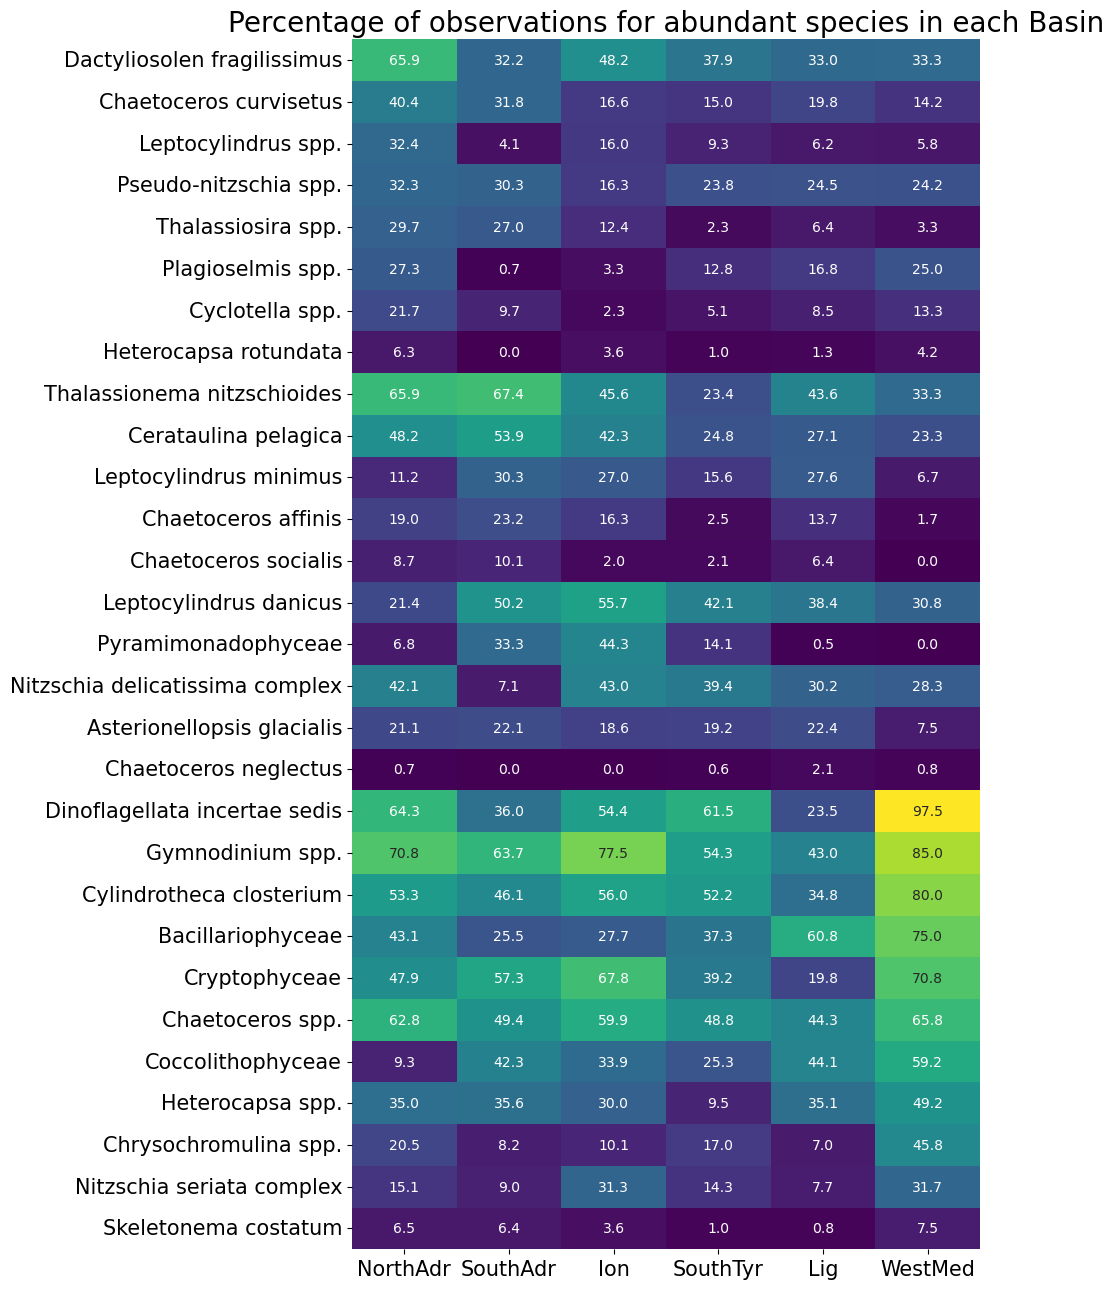

In [88]:
pres_abs = phyto_abund_simplified.query("Taxon in @abund_taxa").pivot_table(
    index= ["Basin", "Date", "id"], 
    columns="Taxon",
    values="Num_cell_l",
    aggfunc="mean",
    fill_value=0
) > 0
pres_abs.reset_index(inplace=True)
n_Basin_samples = pres_abs.drop_duplicates(["Date", "id"]).groupby("Basin", observed=True).count()["id"].to_numpy()
pres_abs = pres_abs.groupby("Basin", observed=True).sum(numeric_only=True).apply(lambda x: x / n_Basin_samples, axis=0).T.loc[abund_taxa[1:], :] * 100
pres_abs_long = pres_abs.reset_index().melt(id_vars = "Taxon", var_name = "Basin", value_name = "Freq")
pres_abs_long["Basin"] = pd.Categorical(pres_abs_long["Basin"], categories = ["NorthAdr", "SouthAdr", "Ion", "SouthTyr", "Lig", "WestMed"], ordered = True)
idx = pres_abs_long.groupby("Taxon")["Freq"].idxmax()
ordered_ids = pres_abs_long.loc[idx].sort_values(["Basin", "Freq"], ascending=[True, False])["Taxon"]


fig, ax = plt.subplots(figsize=(10, 13))

sns.heatmap(
data = pres_abs.loc[ordered_ids, :], 
cmap = "viridis",
annot=True,
fmt=".1f",
ax = ax, 
cbar=False
)
ax.set_yticks(ax.get_yticks());
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, size = 15);
ax.set_xticks(ax.get_xticks());
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 15);
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Percentage of observations for abundant species in each Basin", fontsize = 20)
plt.tight_layout()
plt.savefig(_HOME_ + "/ISPRA_20152017_Analysis/Description/Species_abund_95_heatmap_per_basin.png", dpi = 300, bbox_inches = "tight")

In [315]:
phyto_abund_simplified.loc[:, ["id", "Basin"]].drop_duplicates().to_csv(_HOME_ + "/ISPRA_20152017_Analysis/Description/Station_basin.csv", index=False)

In [317]:
indval = pd.read_csv(_HOME_ + "/ISPRA_20152017_Analysis/Description/indval_per_basin.csv", )

In [321]:
import re
indval.iloc[:, 0] = indval.iloc[:, 0].apply(lambda x: re.sub(r'\.(?!$)', ' ', x))

In [324]:
np.sort(abund_taxa.intersection(set(indval.iloc[:, 0])))

array(['Bacillariophyceae', 'Cerataulina pelagica',
       'Chaetoceros curvisetus', 'Chaetoceros spp.', 'Coccolithophyceae',
       'Cylindrotheca closterium', 'Dactyliosolen fragilissimus',
       'Gymnodinium spp.', 'Gyrodinium spp.', 'Leptocylindrus spp.',
       'Skeletonema spp.', 'Thalassionema nitzschioides',
       'Thalassiosira spp.'], dtype=object)

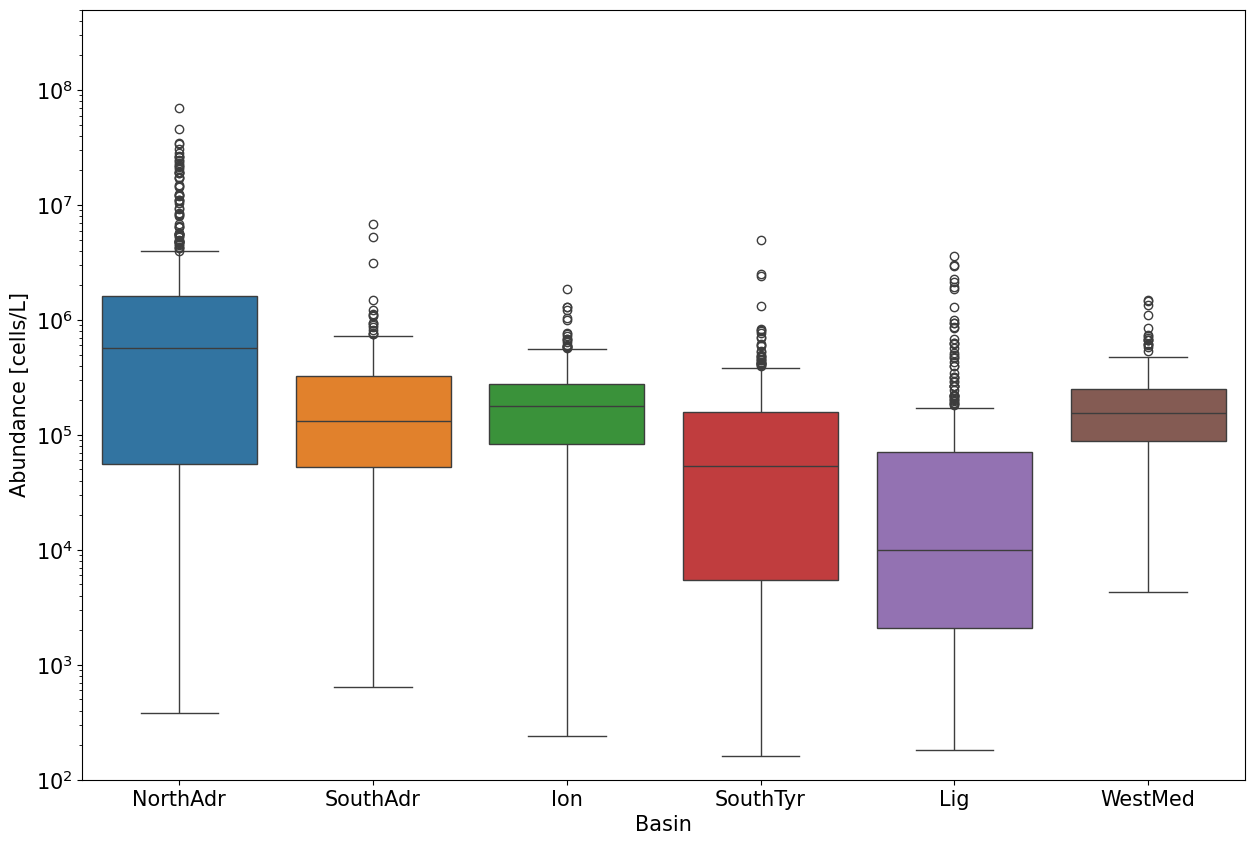

In [89]:
fig, ax = plt.subplots(figsize=(15, 10))

abund = phyto_abund_simplified.groupby(["Date", "id"]).agg(
    {"Num_cell_l" : "sum", 
     "Basin" : "first",
     }
)

sns.boxplot(
    x = "Basin",
    y = "Num_cell_l",
    data = abund,
    hue = "Basin",
    ax = ax
)
ax.set_yscale("log")
ax.set_ylabel("Abundance [cells/L]", size = 15)
ax.set_xlabel("Basin", size = 15)
ax.set_xticks(ax.get_xticks());
ax.set_xticklabels(ax.get_xticklabels(), size = 15);
ax.set_yticks(ax.get_yticks());
ax.set_yticklabels(ax.get_yticklabels(), size = 15);
ax.set_ylim(1e2, 5 * 1e8)
plt.savefig(_HOME_ + "/ISPRA_20152017_Analysis/Description/Abundance_per_basin.png", dpi = 300, bbox_inches = "tight")

In [55]:
"Heterocapsa niei" in phyto_abund_simplified["Taxon"].to_list()

True

In [63]:
phyto_abund_simplified.loc[phyto_abund_simplified["Taxon"].str.contains("hydroideus"), "Taxon"].unique()

array(['Ophiaster hydroideus'], dtype=object)

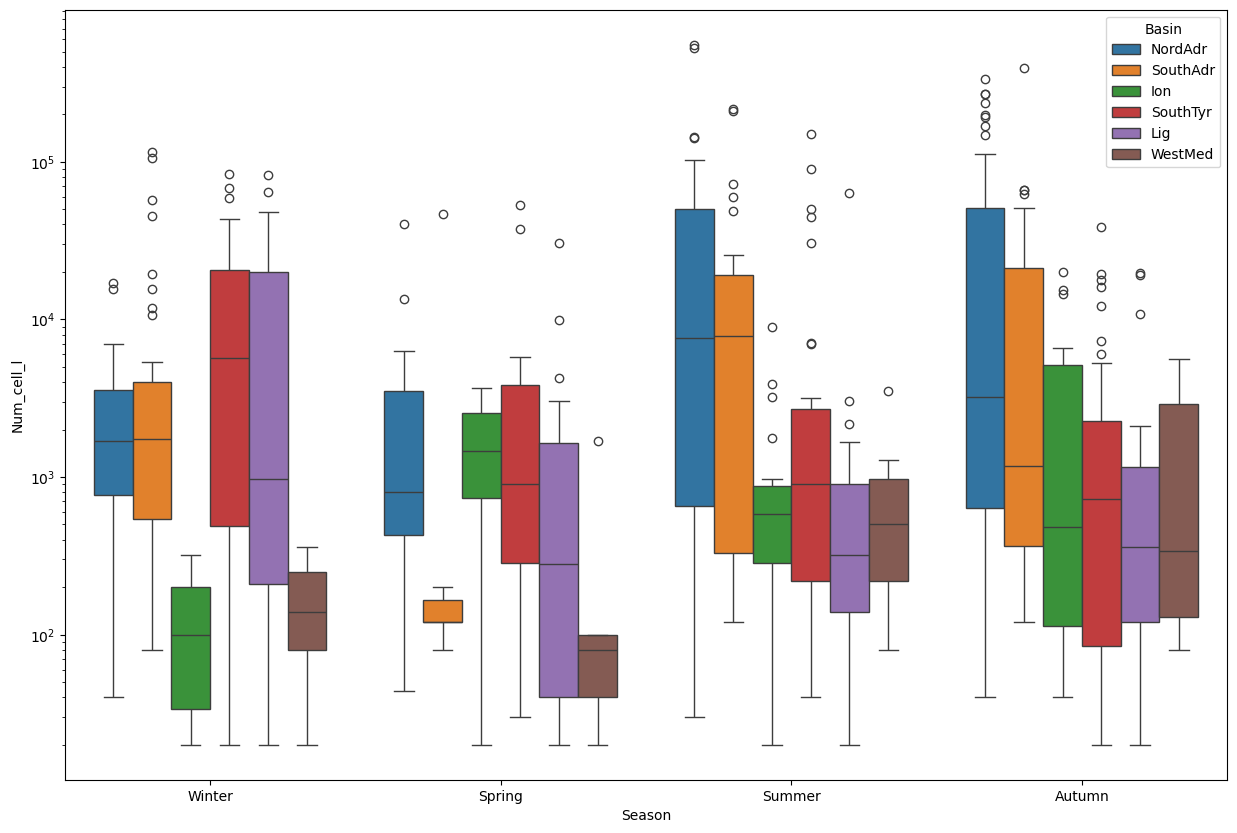

In [71]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.boxplot(
    data = phyto_abund_simplified.query("Taxon == 'Pseudo-nitzschia spp.'"), 
    x = "Season",
    y = "Num_cell_l", 
    hue = "Basin"
)
ax.set_yscale("log")

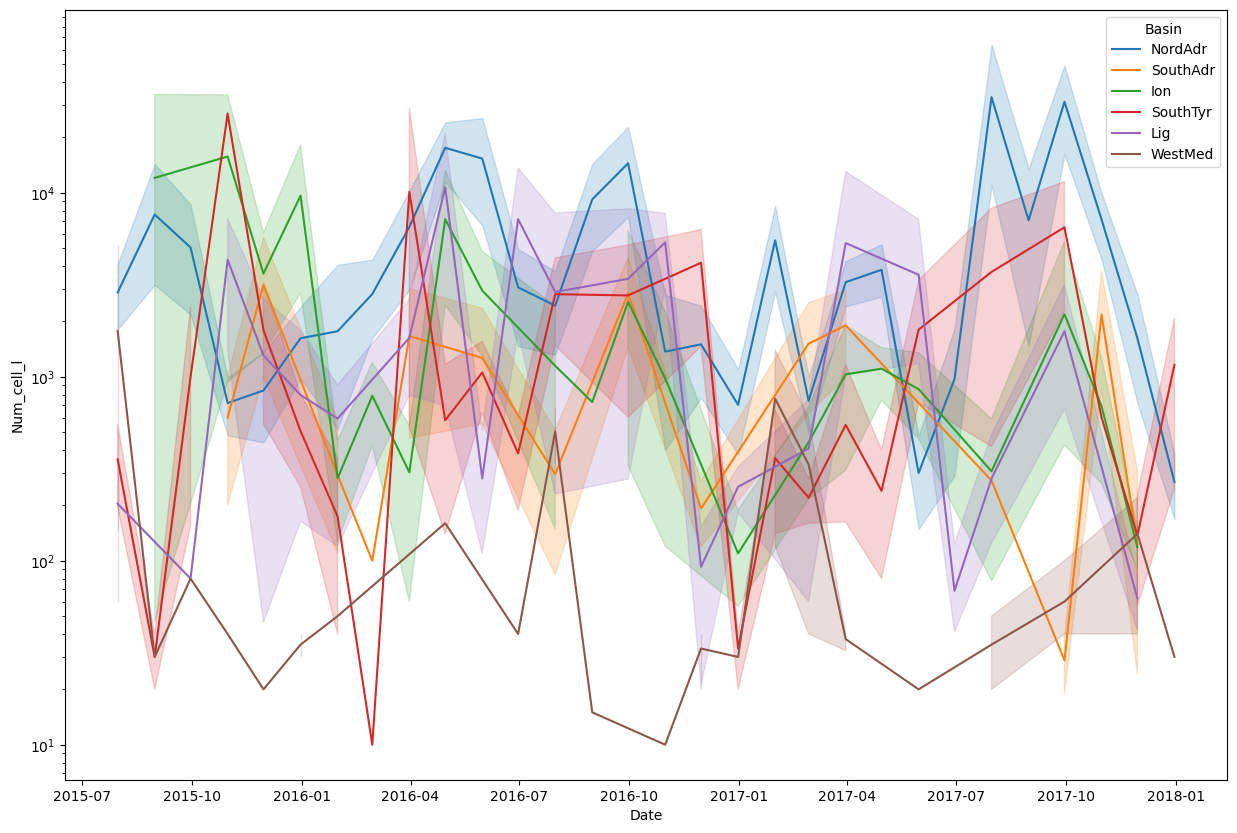

In [53]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.lineplot(
    data = phyto_abund_simplified.query("Taxon == 'Dactyliosolen fragilissimus'"), 
    x = "Date",
    y = "Num_cell_l", 
    hue = "Basin"
)
ax.set_yscale("log")

# Second Part

In [17]:
phyto_abund_simplified.query("Det_level == 'Species'").groupby("Taxon").count().sort_values("Region")["Region"].quantile(0.95)

331.55000000000007

In [22]:
phyto_abund_simplified.query("Det_level == 'Species'").groupby("Taxon").count()[["Region"]].sort_values("Region", ascending = False).query("Region > 332").to_csv(_HOME_ + "/ISPRA_20152017_Analysis/Description/Species_freq_top.csv")

In [27]:
phyto_abund_simplified.drop_duplicates(["Date", "id", "Genus"]).groupby("Genus").count()[["Region"]].quantile(0.95)

Region    1052.8
Name: 0.95, dtype: float64

In [28]:
phyto_abund_simplified.drop_duplicates(["Date", "id", "Genus"]).groupby("Genus").count()[["Region"]].sort_values("Region", ascending = False).query("Region > 1052").to_csv(_HOME_ + "/ISPRA_20152017_Analysis/Description/Genera_freq_top.csv")

In [29]:
phyto_abund_simplified["Det_level"].unique()

array(['Species', 'Genus', 'Higher cat.', 'Unknown'], dtype=object)

In [31]:
phyto_abund_simplified.drop_duplicates(["Date", "id", "Class"]).groupby("Class").count()[["Region"]].quantile(0.95)

Region    1945.6
Name: 0.95, dtype: float64

In [34]:
phyto_abund_simplified.drop_duplicates(["Date", "id", "Class"]).groupby("Class").count()[["Region"]].sort_values("Region", ascending = False).iloc[:12].to_csv(_HOME_ + "/ISPRA_20152017_Analysis/Description/Classes_freq_top.csv")

In [77]:
abund_taxa = pd.read_csv(_HOME_ + "/ISPRA_20152017_Analysis/Description/Species_abund_95.csv").query("Taxon != 'Other phytoplankton'")["Taxon"].to_list()

In [78]:
abund_per_basin = phyto_abund_simplified.groupby(
    "Basin", observed=True
).sum(numeric_only=True)[["Num_cell_l"]]

/tmp/ipykernel_14543/2230839508.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  abund_distribution = phyto_abund_simplified.query("Taxon in @abund_taxa").groupby(["Taxon", "Basin"], observed=True).sum(numeric_only=True)[["Num_cell_l"]].pivot_table(index="Taxon", columns="Basin", values="Num_cell_l", fill_value=0).loc[abund_taxa,:] / abund_per_basin.T.to_numpy() * 100


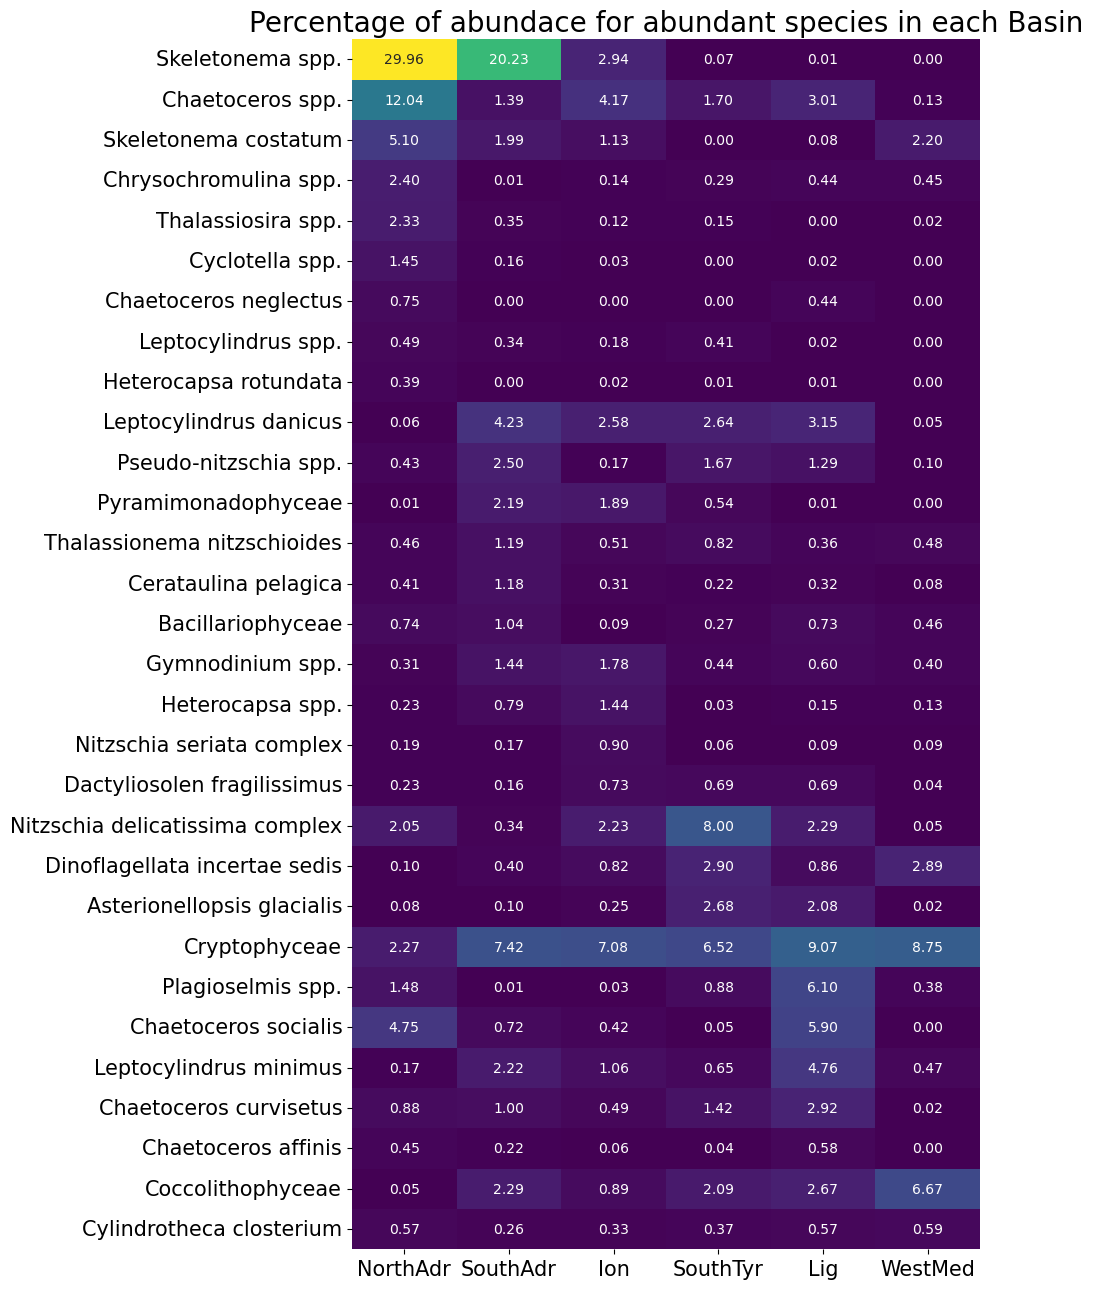

In [90]:
abund_distribution = phyto_abund_simplified.query("Taxon in @abund_taxa").groupby(["Taxon", "Basin"], observed=True).sum(numeric_only=True)[["Num_cell_l"]].pivot_table(index="Taxon", columns="Basin", values="Num_cell_l", fill_value=0).loc[abund_taxa,:] / abund_per_basin.T.to_numpy() * 100
abund_distribution_long = abund_distribution.reset_index().melt(id_vars="Taxon", var_name="Basin", value_name="Freq")
abund_distribution_long["Basin"] = pd.Categorical(abund_distribution_long["Basin"], categories=["NorthAdr", "SouthAdr", "Ion", "SouthTyr", "Lig", "WestMed"], ordered=True)
idx = abund_distribution_long.groupby("Taxon")["Freq"].idxmax()
ordered_ids = abund_distribution_long.loc[idx].sort_values(["Basin", "Freq"], ascending=[True, False])["Taxon"]

fig, ax = plt.subplots(figsize=(10, 13))

sns.heatmap(
data = abund_distribution.loc[ordered_ids, :], 
cmap = "viridis",
annot=True,
fmt=".2f",
ax = ax, 
cbar=False
)
ax.set_yticks(ax.get_yticks());
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, size = 15);
ax.set_xticks(ax.get_xticks());
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 15);
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Percentage of abundace for abundant species in each Basin", fontsize = 20)
plt.tight_layout()
plt.savefig(_HOME_ + "/ISPRA_20152017_Analysis/Description/Species_abund_distribution_heatmap_per_basin.png", dpi = 300, bbox_inches = "tight")

In [12]:
def order_species(df, basins, threshold = 0.5): 
    
    characteristic_species = df.index[np.where(df.loc[:, basins].max(axis = 1) >= threshold)]
    df_long = df.loc[characteristic_species, basins].reset_index().melt(id_vars="Taxon", var_name="Basin", value_name="Value")
    df_long["Basin"] = pd.Categorical(df_long["Basin"], categories=basins, ordered=True)
    idx = df_long.groupby("Taxon")["Value"].idxmax()
    ordered_ids = df_long.loc[idx].sort_values(["Basin", "Value"], ascending=[True, False])["Taxon"]
    return ordered_ids

In [13]:
def indval_plot(df, title = "", file_name = None, figsize = (10, 17), **kwargs): 
    fig, ax = plt.subplots(figsize=figsize)

    sns.heatmap(
    data = df, 
    cmap = "viridis",
    ax = ax, 
    cbar=False,
    **kwargs
    )
    ax.set_yticks(ax.get_yticks());
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, size = 15);
    ax.set_xticks(ax.get_xticks());
    ax.set_xticklabels(ax.get_xticklabels(), fontsize = 15);
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(title, fontsize = 20)
    plt.tight_layout()
    plt.show()
    if file_name is not None: 
        fig.savefig(file_name, dpi = 300, bbox_inches = "tight")

In [15]:
indval_dfs = pd.read_excel(_HOME_ + "/ISPRA_20152017_Analysis/Description/indval_per_basin.xlsx", sheet_name  = None, index_col = 0)

IndVal = indval_dfs["Indval"].loc[:, ["NorthAdr", "SouthAdr", "Ion", "SouthTyr", "Lig", "WestMed", "NorthAdr+SouthAdr", "Lig+SouthTyr", "Lig+WestMed"]]
IndVal_A = indval_dfs["Indval_A"].loc[:, ["NorthAdr", "SouthAdr", "Ion", "SouthTyr", "Lig", "WestMed", "NorthAdr+SouthAdr", "Lig+SouthTyr", "Lig+WestMed"]]
IndVal_B = indval_dfs["Indval_B"].loc[:, ["NorthAdr", "SouthAdr", "Ion", "SouthTyr", "Lig", "WestMed", "NorthAdr+SouthAdr", "Lig+SouthTyr", "Lig+WestMed"]]

IndVal.index = list(map(lambda x: re.sub(r'\.(?!$)', ' ', x), IndVal.index))
IndVal.index.name = "Taxon"
IndVal_A.index = list(map(lambda x: re.sub(r'\.(?!$)', ' ', x), IndVal_A.index))
IndVal_A.index.name = "Taxon"
IndVal_B.index = list(map(lambda x: re.sub(r'\.(?!$)', ' ', x), IndVal_B.index))
IndVal_B.index.name = "Taxon"

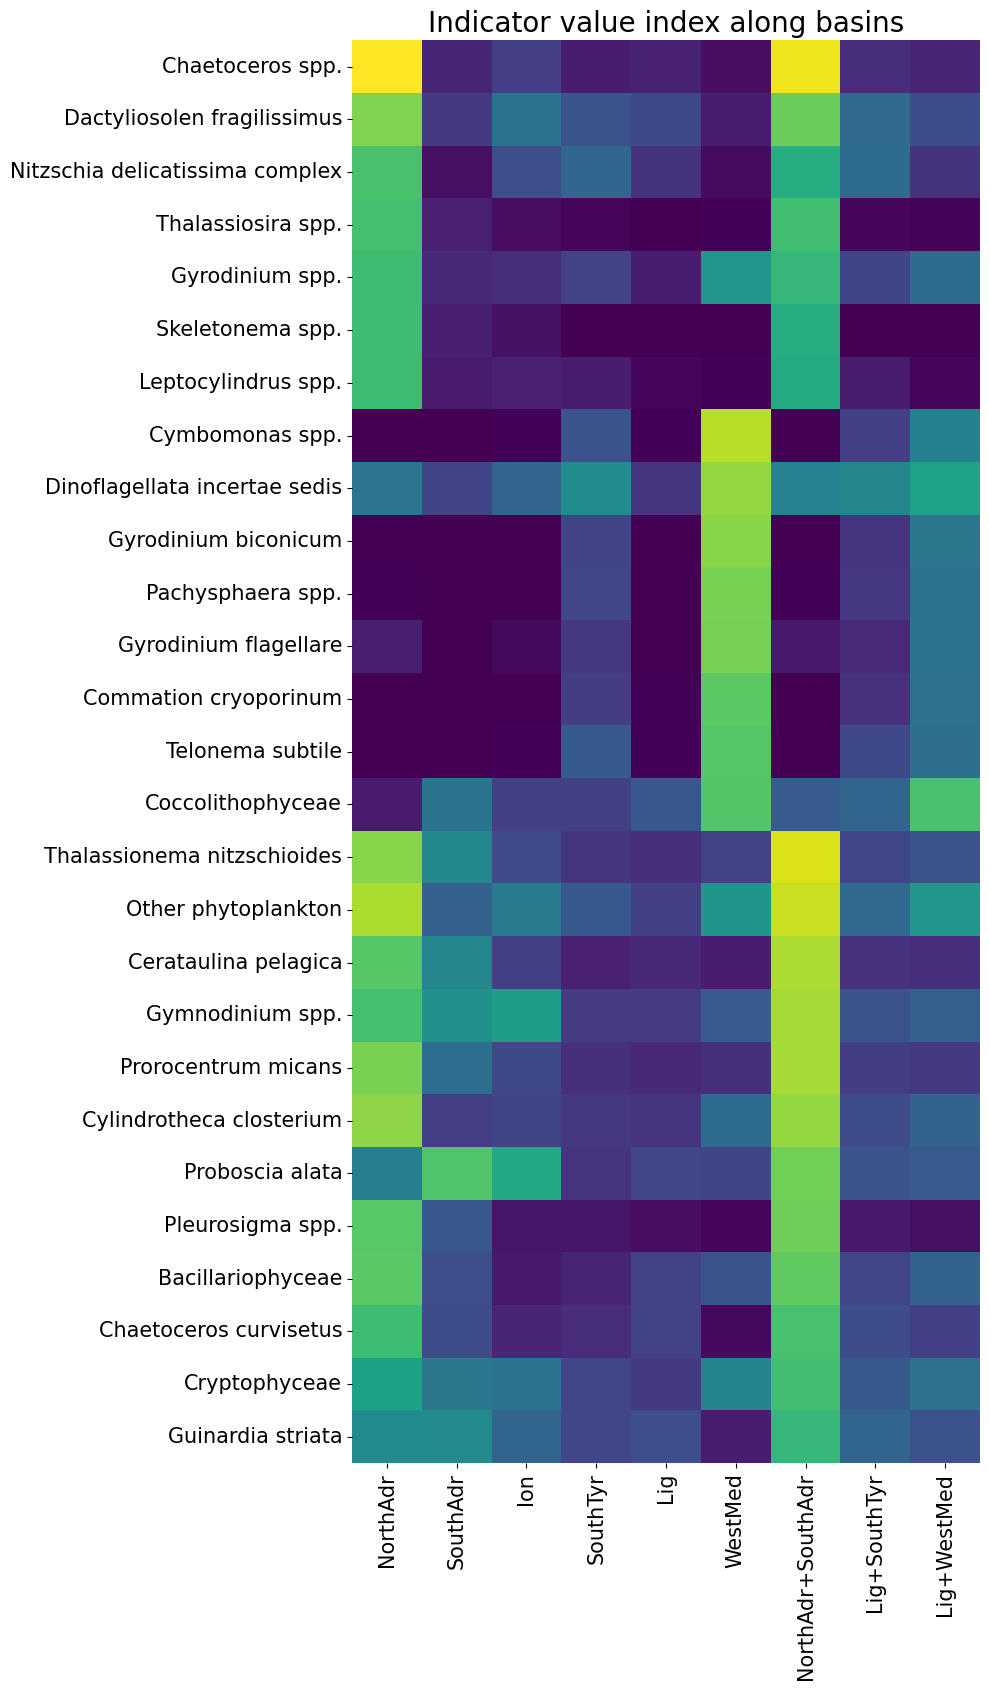

In [34]:
ordered_ids = order_species(IndVal, ["NorthAdr", "SouthAdr", "Ion", "SouthTyr", "Lig", "WestMed", "NorthAdr+SouthAdr", "Lig+SouthTyr", "Lig+WestMed"])
indval_plot(
    IndVal.loc[ordered_ids, :], 
    title = "Indicator value index along basins", 
    file_name = _HOME_ + "/ISPRA_20152017_Analysis/Description/Taxa_indval_per_basin_w_comb.png"
    )

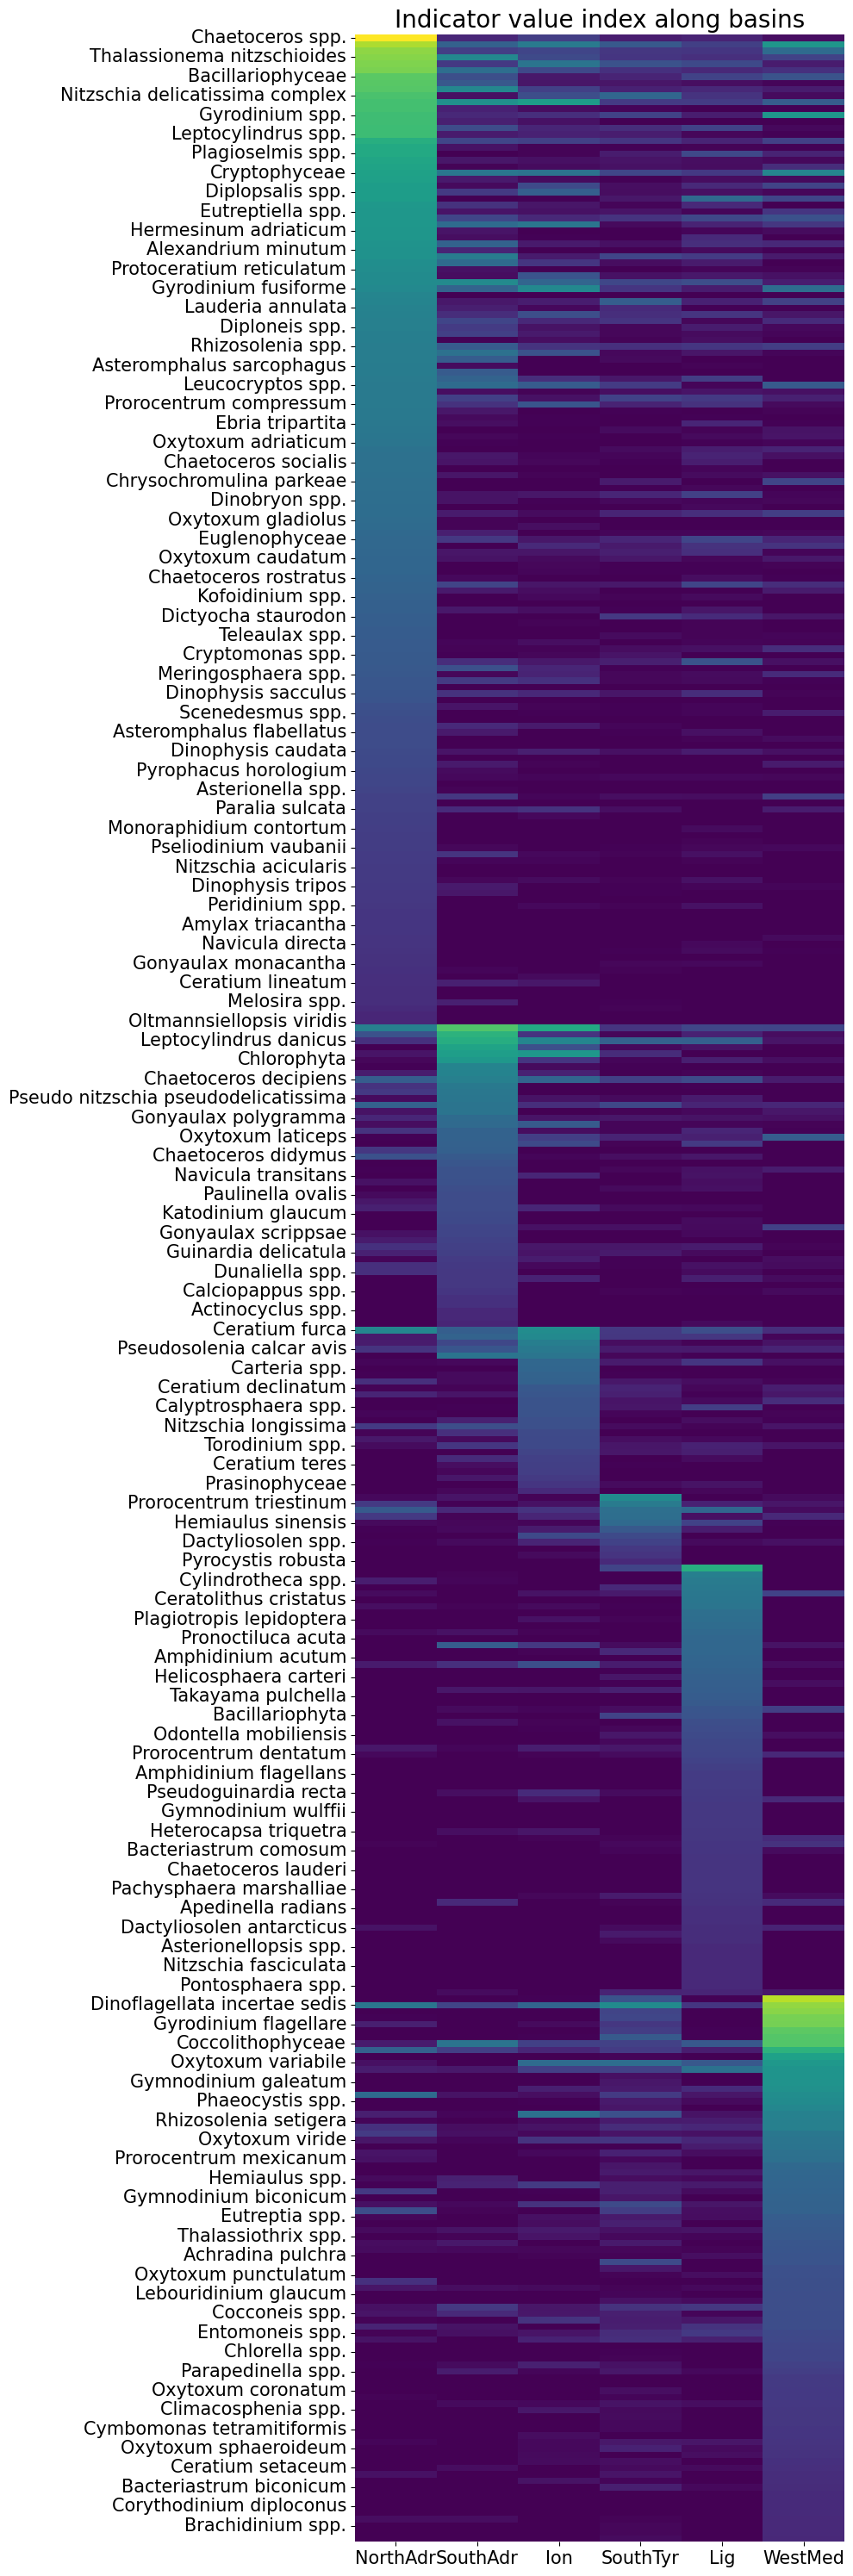

In [16]:
ordered_ids = order_species(IndVal, ["NorthAdr", "SouthAdr", "Ion", "SouthTyr", "Lig", "WestMed"], threshold=0)
indval_plot(
    IndVal.loc[ordered_ids, ["NorthAdr", "SouthAdr", "Ion", "SouthTyr", "Lig", "WestMed"]], 
    figsize = (10, 30),
    title = "Indicator value index along basins", 
    file_name = _HOME_ + "/ISPRA_20152017_Analysis/Description/Taxa_indval_per_basin_w_comb_all_taxa.png"
    )

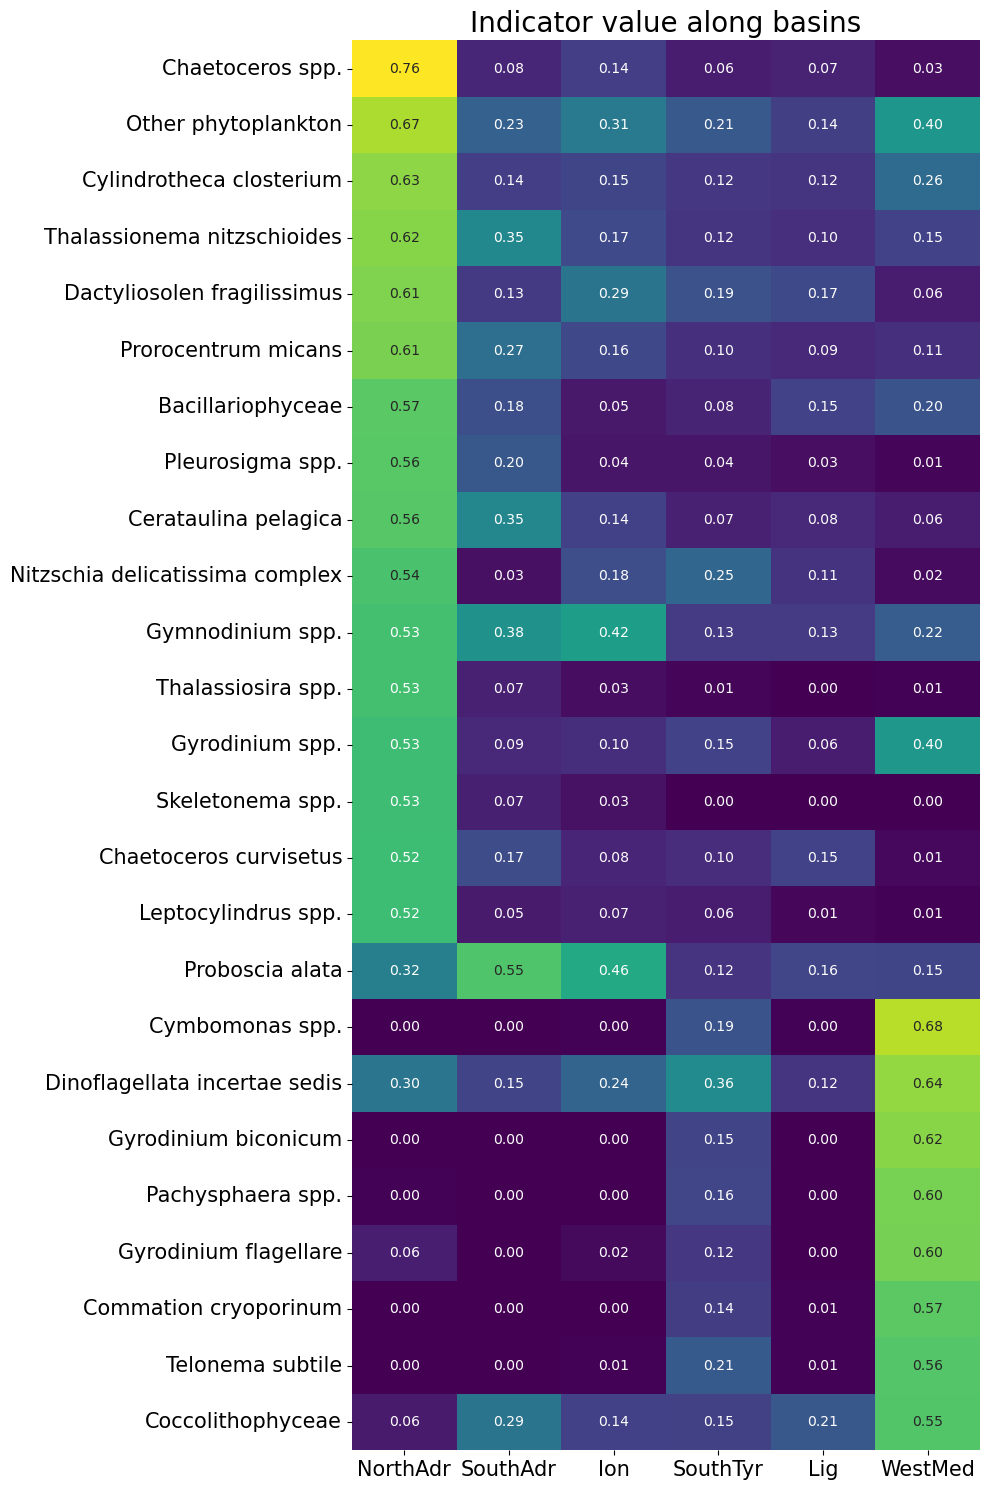

In [22]:
ordered_ids = order_species(IndVal, ["NorthAdr", "SouthAdr", "Ion", "SouthTyr", "Lig", "WestMed"], 0.5)
indval_plot(
    IndVal.loc[ordered_ids, ["NorthAdr", "SouthAdr", "Ion", "SouthTyr", "Lig", "WestMed"]], 
    title = "Indicator value along basins", 
    file_name = _HOME_ + "/ISPRA_20152017_Analysis/Description/Taxa_indval_per_basin.png", 
    figsize = (10, 15),
    annot = True,
    fmt=".2f"
    )

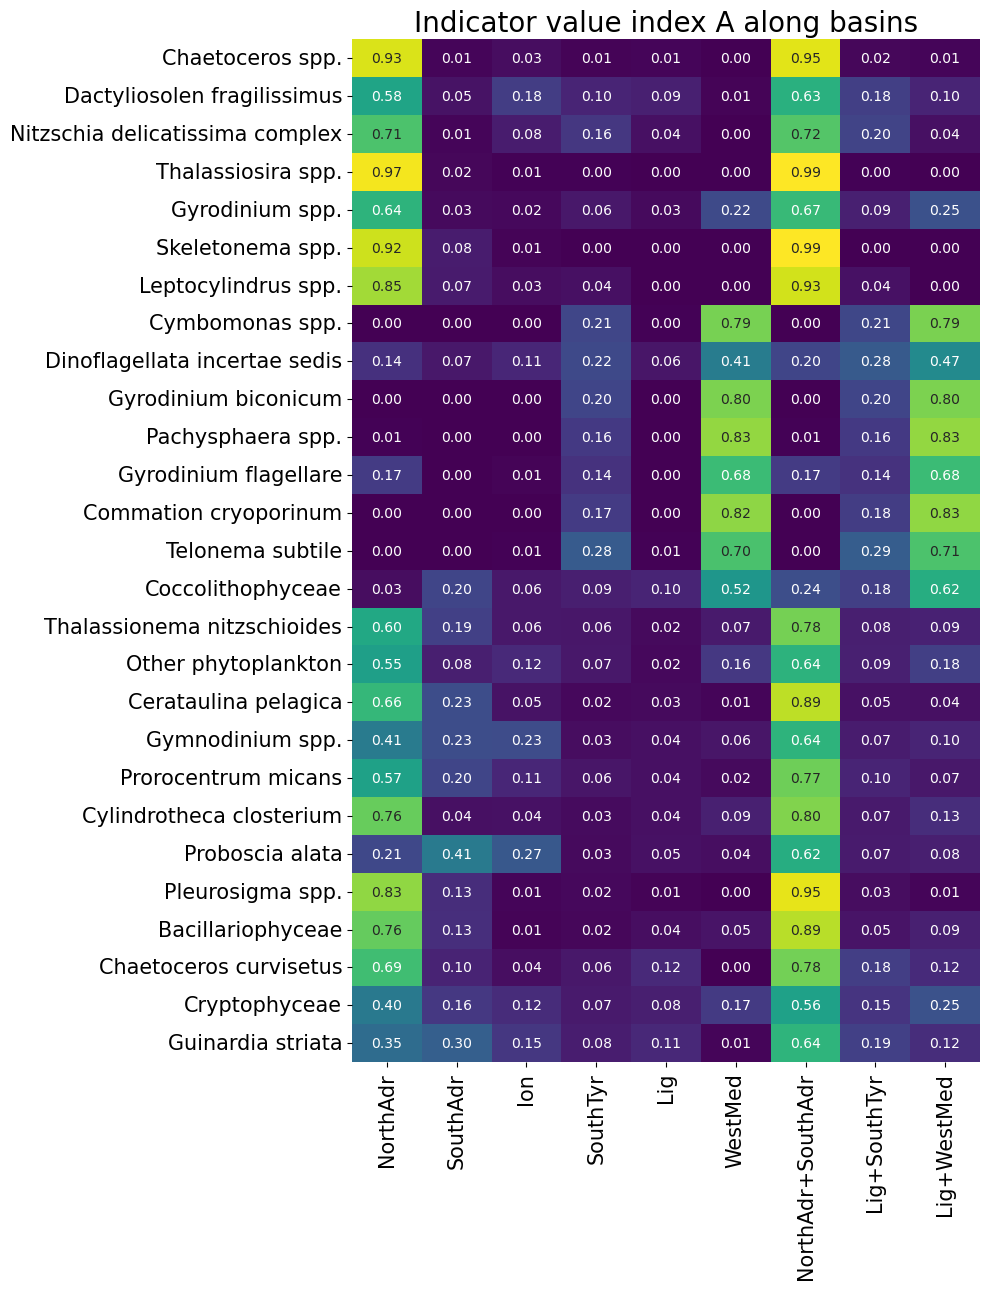

<Figure size 640x480 with 0 Axes>

In [57]:
ordered_ids = order_species(IndVal, ["NorthAdr", "SouthAdr", "Ion", "SouthTyr", "Lig", "WestMed", "NorthAdr+SouthAdr", "Lig+SouthTyr", "Lig+WestMed"])
indval_plot(
    IndVal_A.loc[ordered_ids, :], 
    title = "Indicator value index A along basins", 
    file_name = _HOME_ + "/ISPRA_20152017_Analysis/Description/Taxa_indval_per_basin_A_w_comb.png"
    )

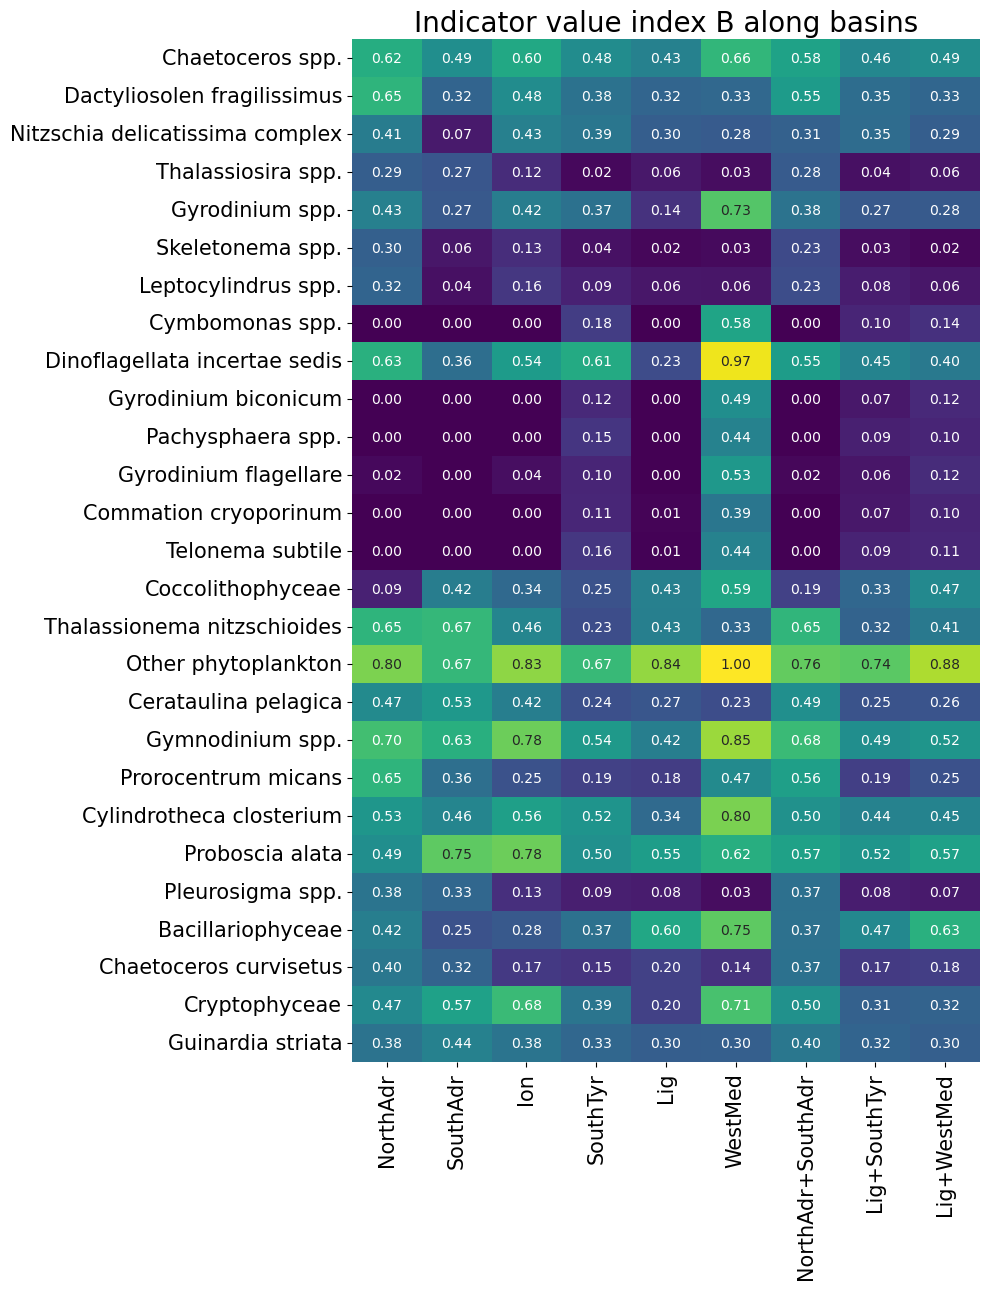

<Figure size 640x480 with 0 Axes>

In [59]:
ordered_ids = order_species(IndVal, ["NorthAdr", "SouthAdr", "Ion", "SouthTyr", "Lig", "WestMed", "NorthAdr+SouthAdr", "Lig+SouthTyr", "Lig+WestMed"])
indval_plot(
    IndVal_B.loc[ordered_ids, :], 
    title = "Indicator value index B along basins", 
    file_name = _HOME_ + "/ISPRA_20152017_Analysis/Description/Taxa_indval_per_basin_B_w_comb.png"
    )

In [7]:
indval_dfs = pd.read_excel(_HOME_ + "/ISPRA_20152017_Analysis/Description/indval_per_basin_log_trasf.xlsx", sheet_name  = None, index_col = 0)

IndVal = indval_dfs["Indval"].loc[:, ["NorthAdr", "SouthAdr", "Ion", "SouthTyr", "Lig", "WestMed", "NorthAdr+SouthAdr", "Lig+SouthTyr", "Lig+WestMed"]]
IndVal_A = indval_dfs["Indval_A"].loc[:, ["NorthAdr", "SouthAdr", "Ion", "SouthTyr", "Lig", "WestMed", "NorthAdr+SouthAdr", "Lig+SouthTyr", "Lig+WestMed"]]
IndVal_B = indval_dfs["Indval_B"].loc[:, ["NorthAdr", "SouthAdr", "Ion", "SouthTyr", "Lig", "WestMed", "NorthAdr+SouthAdr", "Lig+SouthTyr", "Lig+WestMed"]]

IndVal.index = list(map(lambda x: re.sub(r'\.(?!$)', ' ', x), IndVal.index))
IndVal.index.name = "Taxon"
IndVal_A.index = list(map(lambda x: re.sub(r'\.(?!$)', ' ', x), IndVal_A.index))
IndVal_A.index.name = "Taxon"
IndVal_B.index = list(map(lambda x: re.sub(r'\.(?!$)', ' ', x), IndVal_B.index))
IndVal_B.index.name = "Taxon"

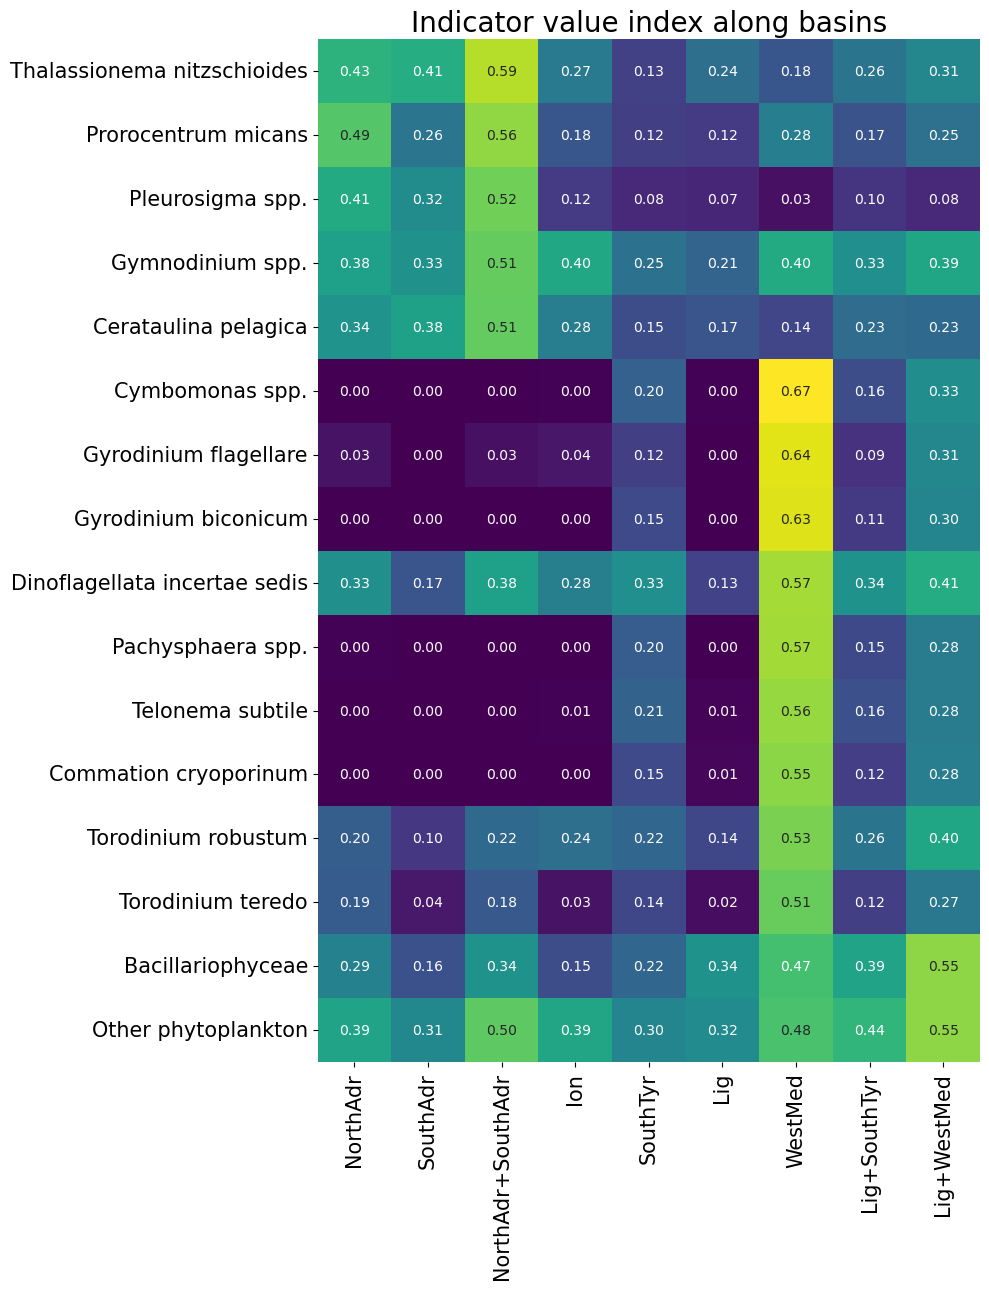

In [10]:
ordered_ids = order_species(IndVal, ["NorthAdr", "SouthAdr", "NorthAdr+SouthAdr", "Ion", "SouthTyr", "Lig", "WestMed", "Lig+SouthTyr", "Lig+WestMed"])
indval_plot(
    IndVal.loc[ordered_ids, ["NorthAdr", "SouthAdr", "NorthAdr+SouthAdr", "Ion", "SouthTyr", "Lig", "WestMed", "Lig+SouthTyr", "Lig+WestMed"]], 
    title = "Indicator value index along basins", 
    file_name = _HOME_ + "/ISPRA_20152017_Analysis/Description/Taxa_indval_per_basin_w_comb_log.png"
    )

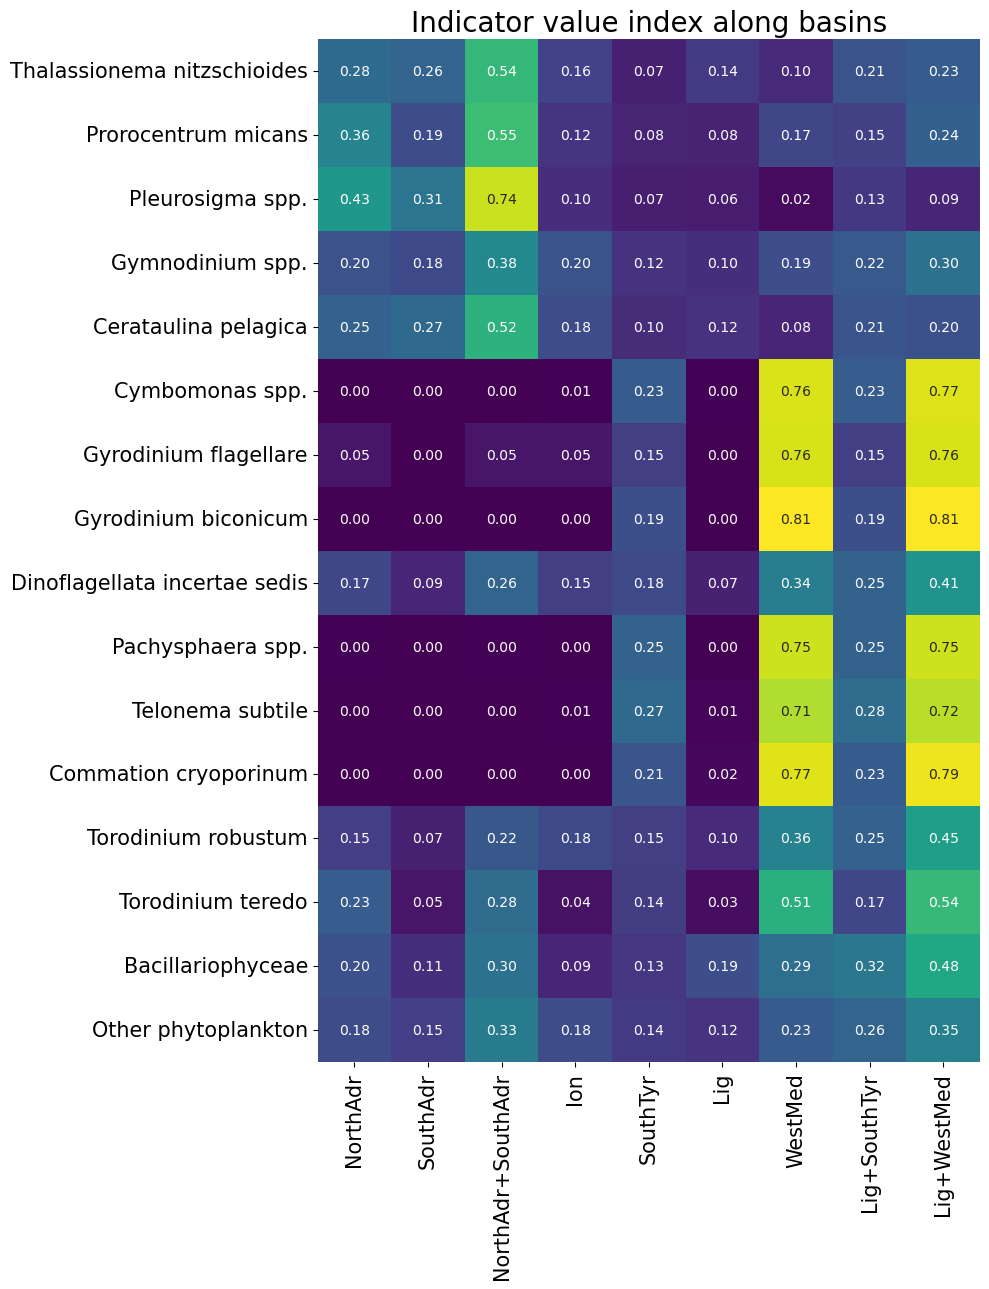

In [11]:
ordered_ids = order_species(IndVal, ["NorthAdr", "SouthAdr", "NorthAdr+SouthAdr", "Ion", "SouthTyr", "Lig", "WestMed", "Lig+SouthTyr", "Lig+WestMed"])
indval_plot(
    IndVal_A.loc[ordered_ids, ["NorthAdr", "SouthAdr", "NorthAdr+SouthAdr", "Ion", "SouthTyr", "Lig", "WestMed", "Lig+SouthTyr", "Lig+WestMed"]], 
    title = "Indicator value index along basins", 
    file_name = _HOME_ + "/ISPRA_20152017_Analysis/Description/Taxa_indval_A_per_basin_w_comb_log.png"
    )

In [94]:
mean_abund = phyto_abund_simplified.groupby(["Basin", "Taxon"], observed=True).mean(numeric_only=True)[["Num_cell_l"]].sort_values("Num_cell_l", ascending = False)

In [92]:
mean_abund.apply(lambda x: x / mean_abund.sum(), axis=1).head(20)

Num_cell_l
Taxon                                      
Skeletonema spp.                   0.254978
Skeletonema costatum               0.141262
Chaetoceros neglectus              0.105204
Chaetoceros socialis               0.091387
Other phytoplankton                0.045399
Chaetoceros spp.                   0.023102
Chaetoceros delicatulus            0.019471
Chaetoceros radicans               0.016403
Thalassiosira spp.                 0.015950
Chrysochromulina spp.              0.015648
Cyclotella spp.                    0.013596
Heterocapsa rotundata              0.013552
Plagioselmis spp.                  0.011448
Leptocylindrus convexus            0.008675
Cyclotella meneghiniana            0.008658
Cyclotella caspia                  0.008536
Cryptophyceae                      0.008425
Nitzschia delicatissima complex    0.007758
Chaetoceros compressus             0.007022
Cyclotella glomerata               0.006290

# Part 3

In [99]:
abund_basin = phyto_abund_simplified.groupby("Basin", observed=True).sum(numeric_only=True)[["Num_cell_l"]]

In [119]:
abund_taxon_basin = phyto_abund_simplified.groupby(["Basin", "Taxon"], observed=True).sum(numeric_only=True)[["Num_cell_l"]].sort_values("Num_cell_l")

In [122]:
top_abund_taxa_basin = abund_taxon_basin.div(abund_basin, axis=0).reset_index().sort_values(["Basin", "Num_cell_l"], ascending=[True, False]).groupby("Basin", observed=True, sort=False).head(5)

Text(0, 0.5, 'Relative abundance')

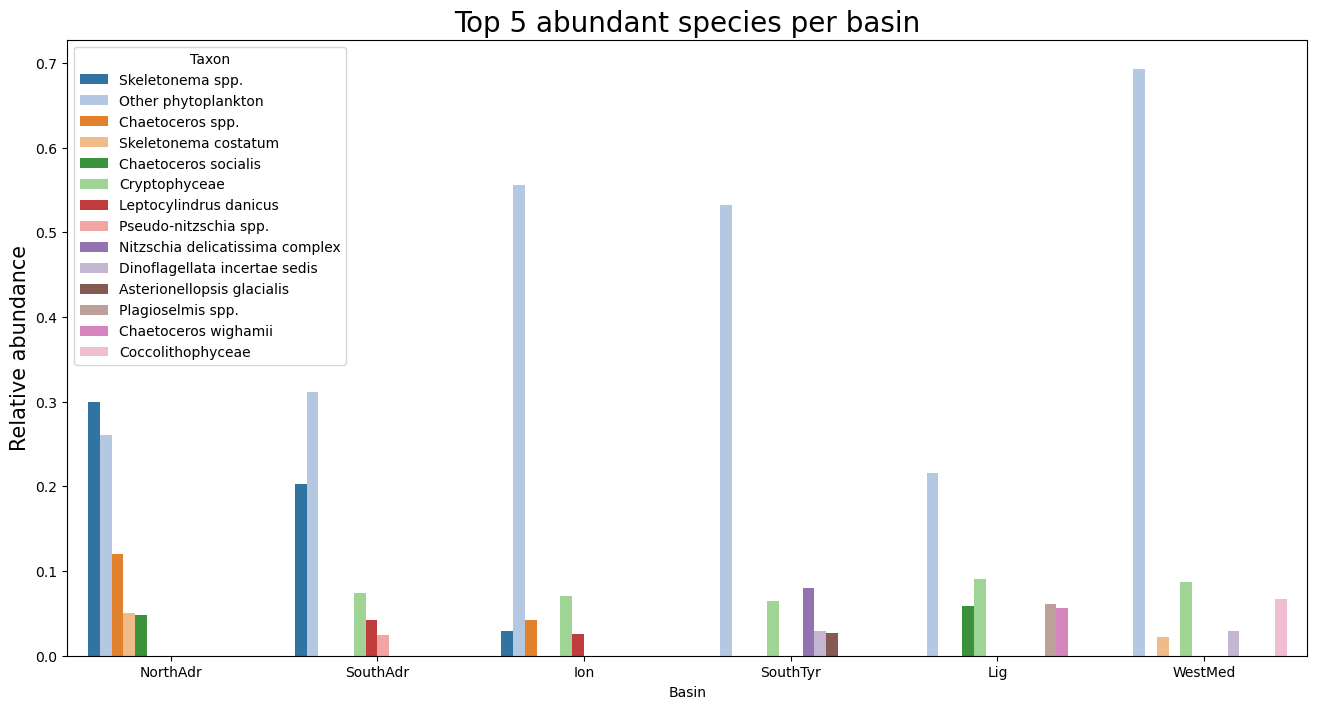

In [195]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(top_abund_taxa_basin, y = "Num_cell_l", x = "Basin", hue = "Taxon", ax = ax, 
            dodge = True, palette = plt.get_cmap('tab20').colors, 
            )
ax.set_title("Top 5 abundant taxa per basin", fontsize = 20)
ax.set_ylabel("Relative abundance", fontsize = 15)

In [202]:
abund_genus = phyto_abund_simplified.loc[:, ["Genus", "Taxon", "Num_cell_l", "Basin"]]

In [204]:
abund_genus.loc[abund_genus["Genus"].isna(), "Genus"] = abund_genus.loc[abund_genus["Genus"].isna(), "Taxon"]

In [205]:
abund_genus_basin = abund_genus.groupby(["Basin", "Genus"], observed=True).sum(numeric_only=True)[["Num_cell_l"]]

In [209]:
top_abund_genus_basin = abund_genus_basin.div(abund_basin, axis=0).reset_index().sort_values(["Basin", "Num_cell_l"], ascending=[True, False]).groupby("Basin", observed=True, sort=False).head(5)

Text(0, 0.5, 'Relative abundance')

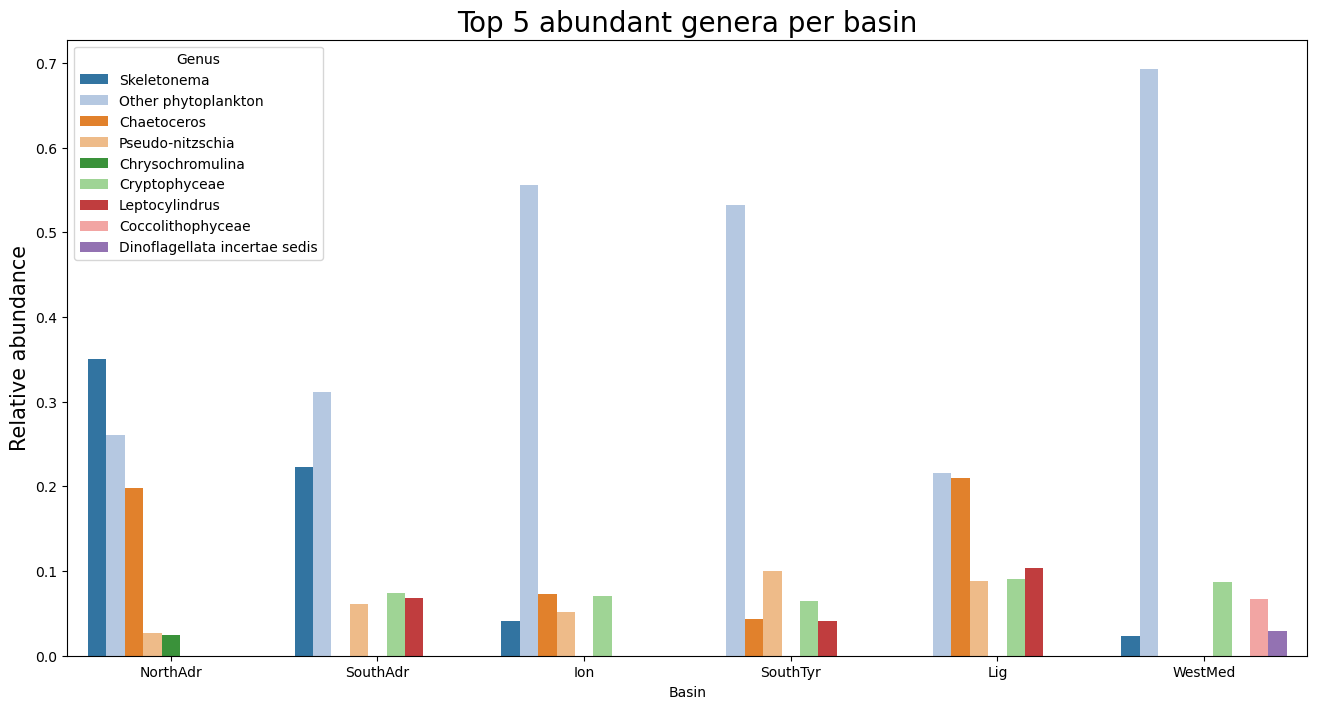

In [211]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(top_abund_genus_basin, y = "Num_cell_l", x = "Basin", hue = "Genus", ax = ax, 
            dodge = True, palette = plt.get_cmap('tab20').colors, 
            )
ax.set_title("Top 5 abundant genera per basin", fontsize = 20)
ax.set_ylabel("Relative abundance", fontsize = 15)